In [19]:
import json
import requests
from config import api_key
from itertools import islice
import matplotlib.pyplot as plt
import requests
import pandas as pd
from scipy.stats import linregress
import random

# Part I - WeatherPy

In [33]:
lat = []
lng = []
cityid=[]
cityname=[]
temp=[]
hum=[]
cloud=[]
wind=[]
random_cities=[]

limit=50000
with open('city_list.json',encoding="utf8") as f:
    data = json.load(f)

for r in islice(data, limit):
    cityid.append(r["id"])
    cityname.append(r["name"])
    print(r["id"], r["name"])
    

833 Ḩeşār-e Sefīd
2960 ‘Ayn Ḩalāqīm
3245 Taglag
3530 Qabāghlū
5174 ‘Arīqah
7264 Kalāteh-ye Dowlat
8084 Behjatābād
9874 Ţālesh Maḩalleh
11263 Shahrīār Kandeh
11754 Bālā Aḩmad Kolā
12795 Aş Şūrah aş Şaghīrah
14177 Āqdūz
14256 Āzādshahr
18007 Gollar
18093 Dīgāleh
18557 Qarālar-e Mīrzā Ḩoseynqolī
18918 Protaras
23814 Kahrīz
24851 Nūrābād
29033 Rokan Sarā
30321 Zīrjān
30485 Dahasuways
30490 Ash Shihr
30543 Al Ghaylah
30616 Judaydah
30689 Dawran
30696 Najd al Jumai
30714 Zalmat al Alya
30729 Suq ar Rabu
30735 Ash Shuqayrah
30740 Mashraah
30748 Ar Rawnah
30762 Ar Ramadi
30777 Al Ahad
30788 Ad Dil
30789 Al Jabin
32516 Badrābād-e `Olyā
32723 Īstgāh-e Rāh Āhan-e Garmsār
32767 Qarchak
34703 Suq Sirwah
34717 Majzar
34724 Bidbadah
34821 Matwah
34827 Suwayr
34846 Wadarah
34862 Suq Shamar
34886 Mustaba
34888 An Nazir
34915 Dayr al Ḩisī
35056 Tabrīz Jānī
36741 Andīmeshk
37755 Ravīndūzaq
39161 Māmā’ī
40847 Reẕāābād
41210 Khorramdarreh
41964 Kūchaklī
44992 Koshtārgāh
45013 Jozf-e Soflá
49518 Republic of

127319 Khorramshahr
127349 Khorramabad
127403 Khomeyn
127878 Khani Yek
127989 Khāmeneh
128008 Khalkhāl
128137 Maḩaleh-ye Khāfī
128222 Ostān-e Kermānshāh
128226 Kermanshah
128231 Kerman
128234 Kerman
128321 Kāzerūn
128447 Kāshmar
128477 Kashan
128747 Karaj
128831 Kangāvar
128905 Kāmyārān
129364 Kalāteh-ye Karbalā’ī Ḩājjī
129406 Kalāteh-ye Bālī
129512 Kalāleh
129933 Jūybār
129945 Jūraqān
130216 Khārk
130245 Javānrūd
130261 Javādīyeh
130758 Islamic Republic of Iran
130801 Ilam Province
130802 Īlām
131222 Hormozgan
131962 Harsīn
131965 Hārom
132142 Ostān-e Hamadān
132144 Hamadān
132548 Gūsheh Shāhzādeh Qāsem
132892 Gorgān
132938 Gonbad-e Kāvūs
132961 Gonābād
133037 Golpāyegān
133349 Ostān-e Gīlān
133533 Gerīzeh
133595 Gerāsh
133964 Garmsār
134217 Bandar-e Genāveh
134460 Fīsherābād
134518 Fīrūzābād
134601 Fareydūnshahr
134602 Fereydūnkenār
134721 Fasā
134762 Fārsān
134766 Fars
134905 pamas
135298 Esfarāyen
135423 Shahrud
136014 Dogonbadan
136256.0 Dezful
136399 Delījān
136702 Dehlorān
13698

172045 Az Zarbah
172059 Az Zabadānī
172082 I‘zāz
172134 ‘Ayn ‘Īsá
172173 ‘Ayn ash Sharqīyah
172232 ‘Ayn al Fījah
172243 ‘Ayn al Bayḑā
172256 ‘Ayn al ‘Arab
172349 At Tall
172374 Ath Thawrah
172408 As-Suwayda
172410 As-Suwayda Governorate
172425 As Sukhnah
172441 Al Mazra‘ah
172454 As Sawdā
172469 Aş Şanamayn
172487 ‘Assāl al Ward
172497 Aş Şafşāfah
172503 As Safīrah
172511 As Sabkhah
172515 As Si‘in
172743 Ash Shaykh Badr
172829 Ash Shajarah
172837 Ash Shaddādah
172880 Arwād
172922 Ar Ruḩaybah
172946 Ar Rastan
172955 Ar Raqqah
172957 Ar-Raqqah Governorate
172994 Arīḩā
173178 An Nashābīyah
173193 An Nabk
173230 Amude
173312 Al Quţayfah
173322 Al Quşayr
173331 Al Qurayyā
173334 Al Qunayţirah
173336 Quneitra Governorate
173361 Al Qaryatayn
173364 Al Qardāḩah
173377 Al Qāmishlī
173389 Al Qadmūs
173414 Al Mushannaf
173462 Mismīyah
173480 Al Mayādīn
173530 Al Mālikīyah
173550 Al Buţayḩah
173576 Latakia
173578 Latakia Governorate
173598 Al Kiswah
173601 Al Khushnīyah
173711 Al Jawādīyah
173811

253456 Soúda
253494 Sofikón
253581 Skópelos
253582 Skópelos
253614 Skýros
253643 Skiáthos
253666 Schísma Eloúndas
253673 Schimatári
253676 Skepastó
253716 Skála Oropoú
253717 Skalánion
253739 Skála
253759 Sitia
253817 Synoikismós Chavaríou
253858 Sými
253866 Sylivainiótika
253871 Sykoúrio
253878 Sikyón
253880 Síkinos
253908 Sykiá
253996 Sérifos
254030 Selínia
254032 Selianítika
254045 Savália
254064 Sardínia
254112 Nomós Sámou
254115 Samos
254123 Sámi
254144 Salamína
254165 Royítika
254170 Roviés
254253 Rodotópi
254283 Rizómylos
254286 Rízoma
254315 Río
254352 Rethymno
254353 Nomós Rethýmnis
254425 Rafína
254442 Pteleós
254505 Psychikó
254546 Psachná
254584 Prokópi
254599 Profítis Ilías
254695 Nomós Prevézis
254698 Préveza
254746 Prámanta
254842 Pórto Chéli
254849 Portariá
254864 Póros
254865 Póros
254898 Politiká
254917 Polichnítos
254949 Plomári
254955 Pligónion
254990 Platýkampos
255013 Platariá
255027 Plátanos Kalivíon
255030 Plátanos
255036 Plátanos
255093 Plataiés
255096 Plános
2

289698 Nu‘ayjah
289739 Madīnat ash Shamāl
289813 Dukhān
289847 Az̧ Z̧a‘āyin
289877 Ash Shīḩānīyah
289884 Ar Ruways
289888 Ar Rayyān
289911 Al Wusayl
289913 Al Wukayr
289915 Al Wakrah
289962 Al Khawr
289975 Al Jumaylīyah
289993 Al Ghuwayrīyah
290030 Doha
290082 Umm ash Sha‘ūm
290104 Sitrah
290118 Sār
290123 Samāhīj
290187 Madīnat ‘Īsá
290215 Jidd Ḩafş
290240 Ḩillat ‘Abd aş Şāliḩ
290247 Madīnat Ḩamad
290269 Dār Kulayb
290291 Kingdom of Bahrain
290332 Al Muharraq
290333 Muharraq Governorate
290340 Manama
290363 Al Ḩadd
290400 Z̧uwayhir
290557 United Arab Emirates
290594 Umm Al Quwain City
290595 Umm al Qaywayn
290624 ‘Ūd al Bayḑā’
290845 Ash Shindaghah
291074 Ras Al Khaimah City
291075 Ra’s al Khaymah
291110 Rafā‘
291279 Muzayri‘
291696 Khawr Fakkān
292223 Dubai
292224 Dubai
292239 Dibba Al-Hisn
292672 Sharjah
292673 Ash Shāriqah
292688 Ar Ruways
292766 Al Qīmī
292836 Al Jaḩr
292878 Al Fujairah City
292879 Al Fujayrah
292913 Al Ain City
292932 Ajman City
292953 Adh Dhayd
292968 Abu Dhabi


310434 Kapıkırı
310479 Kapaklı
310554 Kangal
310641 Kaman
310677 Kalkan
310784 Kale
310789 Kale
310839 Kaklıç
310855 Kâhta
310858 Kahramanmaraş
310859 Kahramanmaraş
310888 Kadışehri
310892 Kadirli
310907 Kadınhanı
310982 Kabala
311044 İzmir
311046 İzmir
311054 İvrindi
311071 Isparta
311073 Isparta
311104 İslahiye
311111 İskenderun
311191 Kavsan
311193 İscehisar
311261 İnönü
311264 İnönü
311314 İncirliova
311319 İncirlik
311358 İncesu
311433 İmranlı
311453 İmamoğlu
311533 Ilıca
311547 İliç
311553 Ilgın
311603 İkizce
311616 İkisaray
311628 Aviski
311645 İhsaniye
311665 Iğdır
311704 İdil
311708 Teffi
311728 Mersin
311777 Hüyük
311869 Hozat
311962 Honaz
311994 Hocalar
311998 Gyundyukoru
312001 Selçuklu
312024 Hizan
312073 Hisar
312114 Hınıs
312134 Hilvan
312143 Hilal
312245 Hekimhan
312253 Hazro
312289 Haymana
312355 Havran
312394 Hatay
312405 Hassa
312406 Alacakaya
312416 Hasköy
312479 Hasankeyf
312504 Hasanbeyli
312523 Haruniye
312531 Harran
312649 Han
312663 Hani
312689 Hancağız
312699 

359900 Aş Şaff
359927 Aşlān
359953 Ash Shuhadā’
360015 Ash Shāţibī
360016 Muḩāfaz̧at ash Sharqīyah
360048 Ashmūn
360464 Al Wāsiţah
360483 Muḩāfaz̧at al Wādī al Jadīd
360502 Luxor
360526 Al Qūşīyah
360531 Al Quşayr
360542 Al Qurayn
360612 Al Qanāyāt
360615 Al Qanāţir al Khayrīyah
360621 Muḩāfaz̧at al Qalyūbīyah
360630 Cairo
360631 Cairo Governorate
360686 Al Minyā
360688 Muḩāfaz̧at al Minyā
360689 Muḩāfaz̧at al Minūfīyah
360716 Al Maţarīyah
360754 Al Manzalah
360761 Al Manşūrah
360773 Al Manshāh
360829 Al Maḩallah al Kubrá
360923 Al Khārijah
360928 Al Khānkah
360995 Giza
360997 Muḩāfaz̧at al Jīzah
361024 Al Janādilah
361029 Al Jammālīyah
361055 Ismailia
361056 Ismailia Governorate
361058 Alexandria
361059 Muḩāfaz̧at al Iskandarīyah
361103 Al Ibrāhīmīyah
361133 Al Ḩubayl
361179 Al Ḩawāmidīyah
361213 Al Ḩāmūl
361291 Hurghada
361294 Muḩāfaz̧at al Gharbīyah
361320 Al Fayyūm
361323 Muḩāfaz̧at al Fayyūm
361329 Al Fashn
361370 Beheira Governorate
361394 Al Bawīţī
361435 Al Balyanā
361457 Al Bā

462035 Zubovo
462050 Zubova Polyana
462052 Zubovo
462095 Zubachevo
462134 Zorino
462169 Zolotukhino
462192 Zolotovo
462197 Zolotnikovskaya Pustyn’
462203 Zolotkovo
462208 Zalapino
462240 Zol’noye
462256 Zakomel’ye
462305 Znamenskoye
462313 Znamenskoye
462320 Znamenka
462322 Znamensk
462323 Znamenki
462330 Znamenka
462352 Znamenka
462357 Znamenka
462377 Zmiyëvka
462383 Zmeyskaya
462413 Zlynka
462444 Zlatoust
462467 Zirgan
462522 Zimovniki
462528 Zimogor’ye
462626 Zilair
462642 Zibrovo
462668 Zhuravskaya
462755 Zhukovskiy
462790 Zhukovo
462792 Zhukovo
462814 Zhukovo
462815 Zhukovka
462822 Zhukovka
462864 Zhornovka
462870 Zholobova-Sloboda
462878 Zhokhovo
462914 Zhizdra
462942 Zhitnitskaya
462964 Zhiryatino
462970 Zhirovo
462976 Zhiroshkino
462983 Zhirkovskiy
462984 Zhirnovsk
462988 Zhirnov
463001 Zhilploshchadka
463035 Zhilino
463037 Zhilino
463038 Zhilino
463043 Zhilina
463050 Zhilëvo
463051 Zhilëvo
463053 Zhiletovo
463082 Zhigulevsk
463134 Zhestylëvo
463144 Zheshart
463145 Zhernovka
46

482654 Titovo
482655 Titovo
482680 Titovo
482702 Titan
482714 Tishkovo
482742 Tishchenskoye
482761 Tirlyanskiy
482810 Timshino
482864 Timonovo
482879 Timonino
482886 Timokhovo
482890 Timokhino
482893 Timokhino
482919 Timkovo
482960 Timenka
482965 Timashëvsk
482986 Tim
482992 Tiliktino
483001 Tiksha
483019 Tikhvin
483020 Tikhtozero
483029 Tikhoretsk
483039 Tikhonovo
483044 Nizhnyaya Maktama
483059 Tikhonikha
483137 Teykovo
483142 Adygeysk
483150 Tetyushi
483184 Tetërino
483200 Teterevikha
483230 Teshilovo
483232 Teshebs
483240 Teryayevo
483269 Terskol
483281 Terskaya
483326 Ternevskaya
483341 Ternovka
483379 Teribërka
483386 Tereze
483439 Terekli-Mekteb
483465 Terekhovo
483469 Terekhovo
483495 Terek
483541 Terbuny
483551 Tyoply Stan
483575 Tëploye
483613 Tëplaya Gora
483642 Ten’gushevo
483645 Tenginka
483650 Temyasovo
483652 Temyashëvo
483654 Tem’yan’
483657 Temta
483661 Temryuk
483684 Temnikov
483689 Tëmkino
483691 Temizhbekskaya
483692 Temizhbekskaya
483696 Temirgoyevskaya
483699 Temi

496735 Sergeyevka
496795 Sergeikha
496802 Sergach
496854 Serëdka
496859 Serëdka
496869 Seredeyskiy
496879 Serebryanyye Prudy
496906 Serebryanka
496934 Serdobsk
496935 Serdobol’
496951 Serakseyevo
496954 Serafimovskiy
496957 Serafimovich
497019 Sennoy
497024 Senno
497094 Sengiley
497097 Sen’ga-Ozero
497162 Sëmkino
497165 Semkhoz
497171 Semivragi
497199 Sëmino
497204 Semilukskiye Vyselki
497206 Semiluki
497210 Semiley
497211 Semiletka
497218 Semikarakorsk
497242 Semibratovo
497243 Semibalki
497255 Semeshki
497260 Semenyuk
497271 Semënovskoye
497273 Semënovskoye
497286 Semënovskoye
497303 Semënovskoye
497342 Semënovskaya
497377 Semënovo
497382 Semënovo
497411 Semënovka
497450 Semënov
497470 Semënkovo
497512 Semchino
497534 Selyatino
497546 Sel’vachëvo
497547 Selty
497592 Sel’tso
497610 Sel’tso
497616 Sel’skaya Maza
497626 Krasnoye
497631 Selo
497661 Selizharovo
497672 Selivanovskiy
497691 Selivanov
497698 Selivanikha
497699 Selivakino
497705 Selit’ba
497764 Selishche
497774 Selishchi
4977

510314 Pes’yane
510323 Pestyaki
510333 Pestrovka
510342 Pestretsy
510347 Pestravka
510357 Pestovo
510364 Pestovo
510375 Pestovo
510378 Pestovo
510410 Pesochnyy
510424 Pesochnya
510442 Pesochnoye
510444 Pesochnoye
510473 Peskovka
510491 Peskovatka
510512 Peski
510520 Peski
510536 Peshkovo
510539 Peshkovo
510541 Peshki
510563 Pesegovo
510582 Peschanka
510613 Peschanokopskoye
510712 Pervushino
510771 Pervoye Maya
510779 Borisov
510808 Pervoural’sk
510814 Pervomayskoye
510820 Pervomayskoye
510833 Pervomayskoye
510842 Pervomayskoye
510878 Pervomayskiy
510899 Pervomayskiy
510911 Pervomayskiy
510934 Urochishche Pervomayskoye
510982 Pervomayskiy
510997 Pervomayskaya
511002 Pervomaysk
511012 Pervoavgustovskiy
511013 Pervo
511093 Pertnury
511153 Perovo
511165 Pernovo
511180 Perm Krai
511196 Perm
511199 Perlovka
511211 Perkhushkovo
511248 Perguba
511264 Pereyaslovskaya
511274 Perevozinskiy
511287 Perevoz
511291 Perevolotskiy
511359 Pereslavl’-Zalesskiy
511386 Perepravnaya
511400 Peremyshl’
511409

522945 Neftegorsk
522946 Neftegorsk
522970 Nefëdovo
522981 Nedvigovka
523028 Nechayevka
523048 Nebug
523051 Nebolchi
523053 Nebogatkovo
523056 Neberdzhayevskaya
523064 Nazran’
523069 Naziya
523077 Nazimikha
523081 Nazhitsy
523094 Nazar’yevo
523110 Nazarovo
523112 Nazarovo
523113 Nazarovo
523137 Kaipkulovo
523161 Navoloki
523186 Navlya
523198 Navashino
523206 Naurskaya
523210 Alpatovo
523266 Nauka
523267 Naugol’noye
523269 Natyrbovo
523270 Natukhayevskaya
523292 Natal’insk
523327 Nastas’ino
523359 Nashchëkino
523382 Naryshkino
523392 Nar'yan-Mar
523405 Nartkala
523408 Nartan
523415 Narovchat
523426 Naro-Fominsk
523443 Narimanov
523476 Naputnovo
523523 Nal’chik
523536 Nakhoy
523544 Nakhlëstovo
523553 Nakhabino
523560 Nagutskoye
523580 Nagorskoye
523583 Nagorsk
523600 Nagornovo
523605 Nagornaya
523644 Nadzhigo
523655 Lakha Nëvre
523662 Nadvoitsy
523715 Nadezhda
523734 Nachalovo
523750 Naberezhnyye Chelny
523774 Myzgi
523790 Myurego
523812 Mytishchi
523816 Myt
523842 Myskhako
523859 Myshki

538601 Kurovskoye
538642 Kasimovo
538666 Kurmysh
538685 Kurmanayevka
538696 Kurlovo
538711 Nizhniy Kurkuzhin
538733 Kurkino
538734 Kurkino
538739 Kurkent
538748 Kurinskaya
538785 Kurilikha
538790 Kurguzovka
538798 Kurgenitsy
538836 Kurganinsk
538879 Kurdzhinovo
538908 Kurchatov
538911 Kurchanskaya
538913 Kurchaloy
538933 Kurbatikha
538937 Kurba
538979 Kurakino
538994 Kurakh
539017 Kupriyanovo
539062 Kupchinino
539069 Kupavna
539075 Kupal’skoye
539110 Kuntsevo
539147 Kungur
539184 Kunavino
539191 Kunakbayev
539218 Kumysh
539221 Kumylzhenskaya
539233 Kumukh
539265 Kumokhino
539276 Kumino
539283 Kumertau
539284 Kumëny
539314 Kumagorsk
539369 Kultayevo
539385 Kuloy
539389 Kulotino
539448 Kulikovo
539452 Kulikovo
539511 Kuli
539537 Kuleshovka
539555 Kulebaki
539578 Kulary
539593 Kulakovo
539598 Kulakovo
539629 Kukuyevka
539640 Kukushtan
539667 Kukshevo
539683 Kukol’
539684 Kukoboy
539689 Kukmor
539781 Kugul’ta
539794 Kugesi
539817 Kudymkar
539818 Kudykino
539839 Kudrovo
539844 Kudrinskaya
5

553972 Kalmykiya
553998 Kalmantay
554052 Kalistovo
554064 Kalinovskoye
554077 Kalinovskaya
554093 Kalinovka
554096 Kalinovka
554153 Kalino
554173 Kalininskaya
554196 Pogost
554199 Kalininsk
554206 Kalinino
554229 Kalinino
554230 Kaliningradskaya Oblast’
554233 Korolev
554234 Kaliningrad
554236 Kalininaul
554263 Kalininovka
554265 Kalinin
554269 Kalinin
554297 Kalikino
554315 Kaleykino
554318 Kalevala
554363 Kalashnikovo
554397 Kalach-na-Donu
554410 Kalach
554444 Kakhun
554453 Kokorikha
554482 Kagal’nitskaya
554486 Kagal’nik
554491 Kafyr-Kumukh
554502 Kadyy
554535 Kaduy
554544 Kadoshkino
554549 Kadom
554554 Kadnikov
554599 Kachkanar
554629 Shestoy Mikrorayon
554654 Kablukovo
554667 Kabardino-Balkarskaya Respublika
554668 Kabardinka
554678 Kabanovo
554692 Kabakovo
554733 Izvest’
554734 Izveshchatel’nyy
554758 Izotino
554767 Izoplit
554770 Izobil’nyy
554776 Iznoski
554787 Izmaylovo
554791 Izmaylovo
554801 Izmaylovka
554806 Izmalkovo
554830 Izhma
554836 Izhevskoye
554840 Izhevsk
554873 Izb

569615 Chekalin
569620 Chegorovo
569632 Chegem Vtoroy
569639 Chegem
569654 Chechevilovo
569665 Chechenskaya Respublika
569666 Chechen-Aul
569677 Chebunovo
569681 Chebsara
569696 Cheboksary
569742 Chaykovskiy
569743 Chaykovskaya
569794 Chastyye
569797 Chastsy
569808 Chasovnya Verkhnyaya
569820 Chasovnya
569835 Chasovennaya
569841 Chashnikovo
569842 Chashnikovo
569876 Chashch’
569934 Chaplygin
569937 Chaplino
569955 Chapayevsk
570003 Chamzinka
570004 Chamzinka
570008 Chamlykskaya
570021 Chaltyr
570032 Malaya Chalmpushka
570086 Chagoda
570089 Chagino
570131 Chaadayevo
570133 Chaadayevka
570140 Bzogu
570141 Bzhidskiy
570146 Bzhedugkhabl’
570158 Bytosh’
570188 Bystrogorskiy
570254 Bykovskaya Step’
570298 Bykovo
570315 Bykovo
570427 Buzuluk
570438 Buzlanovo
570449 Buzharovo
570450 Buzhaninovo
570455 Buzdyak
570479 Buynaksk
570508 Buy
570526 Butyrki
570563 Buturlinovka
570564 Buturlino
570565 Buturlino
570578 Butovo
570579 Butovo
570636 Businovo
570646 Bushkovo
570683 Burtunay
570706 Burtsevo

584742 Oghuz Rayon
584783 Ujar Rayon
584791 Ujar
584792 Türkan
584821 Tovuz
584861 Tovuz Rayon
584871 Terter
584923 Sumqayıt
584938 Stepan Razin
584991 Şuraabad
585030 Shamakhi Rayon
585031 Shaki Rayon
585059 Shamkir Rayon
585103 Qaraçuxur
585145 Saray
585150 Samur
585152 Shamkhor
585156 Shamakhi
585170 Sheki
585184 Sabunçu
585187 Sabirabad
585220 Qusar
585221 Quba
585223 Qobustan
585225 Hacıqabul
585226 Qazax
585227 Qax
585231 Qutqashen
585236 Puta
585333 Oğuz
585379 Hacı Zeynalabdin
585388 Nardaran
585400 Naftalan
585407 Nadil
585514 Mingelchaur
585557 Maştağa
585568 Mardakan
585570 Qobustan
585630 Lökbatan
585666 Qızılhacılı
585738 Qabala Rayon
585749 Qusar Rayon
585786 Quba Rayon
585838 Qobu
585892 Kilyazi
585909 Khyzy
585915 Khirdalan
585940 Khodzhi-Gasan
585967 Goygol Rayon
586001 Khachmaz Rayon
586031 Korgöz
586047 Kalbajar District
586087 Qazakh Rayon
586112 Goranboy Rayon
586135 Qarayeri
586265 Vurğun
586268 Kerbakhiar
586289 Qala
586290 Qakh Rayon
586318 İsmayıllı
586320 Isma

616230 Shenavan
616231 Shenavan
616250 Sevan
616255 Sarukhan
616259 Sarigyugh
616262 Saratak
616265 Saramej
616273 Sarahart’
616278 Geghakert
616288 Ptghni
616289 Ptghunk’
616290 P’shatavan
616291 Prroshyan
616297 P’ok’r Mant’ash
616299 Zoravan
616303 Pemzashen
616306 Parravak’ar
616320 Oshakan
616328 Sardarapat
616330 Odzun
616333 Noyemberyan
616340 Nor Gyugh
616341 Nor Geghi
616345 Norashen
616350 Norashen
616352 Nor Armavir
616353 Nor Aresh
616356 Noramarg
616359 Norakert
616361 Noratus
616375 Nerk’in Getashen
616383 Navur
616385 Nalbandyan
616391 Basen
616396 Hovtamej
616399 Mrgashen
616400 Mrgashat
616401 Mrganush
616403 Mosesgegh
616410 Mets Parni
616411 Mets Masrik
616412 Mets Mant’ash
616416 Metsavan
616417 Metsamor
616418 Merdzavan
616421 Meghrashen
616424 Meghradzor
616429 Mayakovski
616435 Masis
616438 Martuni
616441 Marmarashen
616442 Marmashen
616445 Margahovit
616446 Maralik
616453 Mayisyan
616456 Madina
616464 Lukashin
616465 Lorut
616471 Lichk’
616474 Lerrnavan
616476 L

630769 Ylivieska
630779 Ylitornio
630780 Ylitornio
630805 Ylistaro
630821 Yli-Raumo
630918 Ylikiiminki
630952 Yli-Ii
630953 Yli-Ii
630956 Ylihärmä
630998 Yläne
631003 Ylämaa
631191 Vuolijoki
631254 Vöyri
631273 Voistia
631282 Voikkaa
631358 Virtasalmi
631376 Virrat
631377 Virrat
631448 Vimpeli
631449 Vimpeli
631459 Vilppula
631511 Viljakkala
631560 Viitasaari
631566 Viitasaari
631693 Viiala
631707 Vihti
631708 Vihti
631747 Viheriälä
631758 Vihanti
631760 Vihanti
631778 Vieremä
631780 Vieremä
631825 Veteli
631827 Veteli
631856 Vesilahti
631857 Vesilahti
631873 Vesanto
631875 Vesanto
631994 Velkua
632041 Vehmersalmi
632056 Vehmainen
632062 Vehmaa
632063 Vehmaa
632084 Vehkaperä
632220 Majaniemi
632225 Västanfjärd
632361 Varpaisjärvi
632370 Varkaus
632371 Varkaus
632421 Vårdö
632425 Vårdö
632453 Vantaa
632539 Vampula
632542 Vammala
632552 Valtimo
632553 Valtimo
632669 Valkeala
632672 Valkeakoski
632674 Valkeakoski
632860 Vahto
632923 Vähäkyrö
632924 Vähäkyrö
632978 Vaasa
632979 Vaasa
63309

660522 Brändö
660528 Brändö
660561 Porvoo
660562 Porvoo
660630 Björnvik
660735 Pännäinen
660838 Auttoinen
660873 Aura
660874 Aura
660927 Askola
660932 Askola
660940 Askainen
660949 Asikkala
660951 Asikkala
660974 Artjärvi
661164 Anjala
661226 Amuri
661242 Ämmälä
661352 Alavus
661353 Alavus
661363 Alavieska
661364 Alavieska
661410 Alastaro
661411 Alastaro
661520 Alakylä
661576 Alajärvi
661594 Alajärvi
661601 Alahärmä
661882 Ahvenanmaan Lääni
661896 Ähtäri
661897 Ähtäri
662036 Ahdenkallio
662095 Äänekoski
662096 Äänekoski
662114 Ghioca
662118 Zvoriştea
662128 Zorlenţu Mare
662130 Zorleni
662161 Zlatna
662187 Zimnicea
662193 Zâmbreasca
662195 Zimbor
662197 Zimandu Nou
662204 Ziduri
662217 Zetea
662222 Zerind
662225 Zemeş
662254 Zăvoi
662259 Zăvoaia
662274 Zătreni
662284 Zărnești
662285 Zărneşti
662293 Zărand
662302 Zăpodeni
662315 Zăneşti
662317 Zamostea
662327 Zam
662332 Zalha
662334 Zalău
662349 Zagra
662352 Zagon
662357 Zagăr
662366 Zăbrani
662373 Zăbala
662376 Vutcani
662379 Vurpăr
66

668266 Săgeata
668269 Şag
668278 Sadu
668286 Sadova
668287 Sadova
668297 Săcueni
668300 Sacu
668304 Sacoşu Turcesc
668310 Săceni
668312 Săcelu
668314 Săcele
668315 Săcele
668320 Săcel
668322 Săcel
668330 Săcăşeni
668342 Săcălaz
668353 Săcădat
668365 Săbăoani
668382 Ruşii Munţi
668394 Ruşeţu
668431 Rusăneşti
668435 Rus
668442 Rupea
668465 Runcu
668466 Runcu
668467 Runcu
668474 Runc
668488 Ruginoasa
668495 Rugineşti
668542 Rucăr
668546 Roznov
668548 Rozavlea
668552 Pecica
668555 Rovinari
668569 Rotunda
668600 Roșu
668605 Roșiorii de Vede
668618 Roşiori
668620 Roşiori
668628 Roşiile
668631 Roşieşti
668643 Roşia de Secaş
668645 Roşia de Amaradia
668653 Roşia
668656 Roşia
668660 Roseţi
668681 Rona de Sus
668683 Rona de Jos
668687 Romuli
668693 Romos
668698 Români
668723 Romanu
668732 Roman
668737 Roma
668742 Rohia
668751 Rogova
668766 Roeşti
668772 Rodna
668781 Rociu
668788 Robeasca
668799 Roata de Jos
668815 Râu de Mori
668828 Râşnov
668849 Ripiceni
668872 Râmnicu Vâlcea
668873 Râmnicu Săr

674654 Livezeni
674673 Livada de Bihor
674679 Livada
674685 Livada
674696 Liteni
674706 Liţa
674708 Lișteava
674721 Lisa
674723 Lisa
674726 Lipovu
674730 Lipovăţ
674732 Lipova
674733 Lipova
674735 Lipniţa
674745 Lipăneşti
674782 Limanu
674796 Lieşti
674799 Liebling
674804 Licurici
674823 Leu
674826 Letea Veche
674834 Leţcani
674837 Letca
674841 Leşu
674844 Lespezi
674864 Lereşti
674880 Leordina
674885 Leordeni
674889 Leorda
674895 Lenauheim
674898 Lemnia
674904 Leleşti
674910 Leleasca
674916 Lehliu-Gară
674918 Lehliu
674933 Lechinţa
674945 Lazuri de Beiuş
674947 Lazuri
674972 Lăzăreni
674975 Lăzarea
674977 Laza
675000 Lăstuni
675003 Laslea
675017 Largu
675033 Lăpuşnicu Mare
675035 Lăpuşnicel
675045 Lăpuş
675048 Lăpugiu de Jos
675063 Lancrăm
675071 Laloşu
675085 Lădeşti
675130 Jurilovca
675162 Juc-Herghelie
675168 Josenii Bârgăului
675171 Joseni
675182 Jorăşti
675193 Joiţa
675208 Jitia
675211 Jitani
675215 Jirlău
675218 Jina
675223 Jimbolia
675227 Jilavele
675231 Jilava
675235 Jijila
67

682712 Carastelec
682714 Caraş-Severin
682716 Caraşova
682729 Caransebeş
682734 Cărand
682747 Caracal
682750 Căpuşu Mare
682789 Căpreni
682800 Căpleni
682806 Căpâlniţa
682812 Căpâlna
682844 Căneşti
682863 Cămărzana
682866 Cămăraşu
682870 Camăr
682873 Calvini
682907 Călugăreni
682912 Călugăreni
682931 Călmăţuiu
682937 Călineşti-Oaş
682953 Călineşti
682958 Călineşti
682960 Călineşti
682972 Călimăneşti
682997 Căldăraru
683004 Călăţele
683020 Călăraşi
683021 Călăraşi
683023 Călăraşi
683030 Călan
683033 Calafindeşti
683034 Calafat
683041 Cajvana
683042 Căiuţi-Sat
683050 Căianu Mic
683051 Căianu Mic
683084 Cacica
683092 Căbeşti
683100 Buzoeşti
683105 Buziaş
683111 Buzescu
683121 Buzău
683123 Buzău
683129 Buza
683132 Buturugeni
683146 Butoieşti
683153 Butimanu
683160 Buteni
683166 Butea
683178 Bustuchin
683179 Buşteni
683184 Buştea
683202 Burueneşti
683226 Burila Mare
683252 Bunteşti
683268 Șes
683278 Buneşti
683279 Buneşti
683282 Buneşti
683294 Bumbeşti-Jiu
683296 Bumbești-Pițic
683305 Bulze

686895 Zolochiv
686896 Zolochiv
686898 Zol’noye
686919 Znomenka
686928 Zmiyiv
686932 Zlynka
686943 Zlatopil’
686949 Zinkivtsi
686966 Zhytomyrs’ka Oblast’
686967 Zhytomyr
686970 Zhvanets
687009 Zhuravka
687021 Zhuliany
687032 Zhukovka
687060 Zhovtnevoye
687065 Blahodatne
687093 Zhovkva
687116 Zhmerynka
687150 Zhigulina Roshcha
687191 Zhelyabovka
687196 Zhovti Vody
687245 Zhashkiv
687277 Zgurovka
687292 Zin’kiv
687301 Zemlyanichnoye
687345 Zelenyy Hay
687363 Zelene
687388 Zelenogor'e
687432 Zdolbuniv
687433 Zdovbytsya
687449 Zboriv
687455 Zbarazh
687501 Zavods’ke
687526 Zavallya
687556 Karolino-Buhaz
687557 Zatoka
687562 Zatyshshya
687578 Zastavna
687602 Zorya
687640 Zarech’ye
687645 Zarichchya
687652 Zarichne
687656 Zarechnoye
687669 Zaprudnoye
687670 Zaprudnoye
687676 Zaporizhzhya-Live
687699 Zaporiz’ka Oblast’
687700 Zaporizhia
687726 Zaozyornoye
687746 Zamost’ye
687787 Zaliztsi
687790 Zaliznyy Port
687796 Zaliznychne
687797 Zaliznychne
687824 Zalesnoye
687825 Zalesnoye
687826 Zalishc

703363 Laspi
703397 Lanivtsi
703410 Lanchyn
703423 Lagernoye
703428 Ladyzhyn
703438 Ladan
703446 Kyiv Oblast
703447 Misto Kyyiv
703448 Kyiv
703455 Kvasy
703464 Kuznetsovsk
703494 Kuybysheve
703498 Kuibyshevo
703514 Kuty
703518 Verkhnyaya Kutuzovka
703537 Kuteynykove
703555 Kushuhum
703559 Kushnytsya
703586 Kurpaty
703596 Kurortnoye
703625 Kurenëvka
703646 Kurakhovo
703656 Kupjansk
703706 Kulynychi
703713 Kulykivka
703716 Kulykiv
703728 Kulebivka
703757 Kukhmisterskaya Sloboda
703776 Kudrino
703844 Kryzhanivka
703845 Kryvyi Rih
703863 Sanatoriy Kryms’ke Prymor”ya
703883 Autonomous Republic of Crimea
703903 Kruty
703972 Krucha
703973 Urochishche Krucha
704000 Krolevets’
704010 Kryve Ozero
704048 Kryva Hora
704051 Krivaya Balka
704055 Kryva
704067 Krinichki
704074 Krinichnaya
704079 Krynychky
704116 Urochyshche Kripke
704118 Kripens’kyy
704121 Krenychi
704130 Tatariv
704138 Kreminna
704143 Kremenets
704147 Kremenchuk
704183 Krasnyy Shlyakh
704201 Krasnyi Mak
704202 Krasnyy Luch
704204 Lym

716941 Nyírcsaholy
716943 Nyírbogdány
716945 Nyírbogát
716946 Nyírbéltek
716948 Nyírbátor
716949 Nyirántanya
716951 Nyíradony
716952 Nyíracsád
716954 Nyírábrány
716963 Nyerjesszőllő
716968 Nyékládháza
717016 Németi
717042 Napkor
717118 Nagyszőllő
717130 Nagyszénás
717172 Nagyrábé
717281 Nagykálló
717345 Nagyhalász
717357 Nagygajla
717397 Nagyecsed
717400 Nagydobos
717406 Nagycserkesz
717449 Nádudvar
717497 Múcsony
717521 Monostorpályi
717530 Monok
717570 Mocsolya
717582 Miskolc
717591 Mindszent
717612 Mikitatanya
717616 Mikepércs
717632 Mezőzombor
717635 Mezőtúr
717642 Mezőssytag
717652 Mezőkövesd
717656 Mezőkovácsháza
717658 Mezőkeresztes
717662 Mezőhegyes
717667 Mezőcsát
717669 Mezőberény
717693 Mérk
717694 Mérgeszug
717721 Méhkerék
717726 Megyaszó
717741 Medgyesegyháza
717758 Mátraderecske
717771 Mátészalka
717779 Második Rozsréti Bokor
717805 Maroslele
717825 Máriapócs
717833 Máriafürdő
717844 Maradékdűlő
717853 Mándok
717861 Mályi
717883 Malombirtokosság
717902 Makó
717904 Maklár


727693 Obshtina Razgrad
727696 Razgrad
727704 Razdel
727735 Ravno
727752 Ravna
727759 Ravda
727760 Ravadinovo
727762 Rastnik
727787 Obshtina Rakovski
727791 Rakovski
727797 Rakov Dol
727800 Obshtina Rakitovo
727801 Rakitovo
727820 Raduil
727831 Obshtina Radomir
727832 Radomir
727837 Obshtina Radnevo
727838 Radnevo
727843 Radinovo
727847 Radilovo
727859 Radanovo
727884 Parvomaytsi
727886 Parvomay
727919 Obshtina Provadia
727921 Provadia
727925 Prosenik
727926 Prosena
727932 Prolesha
727941 Profesor Ishirkovo
727951 Prisovo
727964 Primorsko
727970 Prezhda
727986 Obshtina Veliki Preslav
727987 Veliki Preslav
728011 Pravets
728016 Pravda
728032 Potop
728044 Posabina
728053 Porominovo
728055 Obshtina Pordim
728056 Pordim
728074 Obshtina Popovo
728075 Popovo
728084 Popkralevo
728106 Obshtina Pomorie
728108 Pomorie
728111 Polyatsite
728123 Obshtina Polski Trambesh
728124 Polski Trambesh
728141 Polikrayshte
728143 Poleto
728147 Polena
728152 Pokrayna
728157 Podrvrah
728169 Podgumer
728177 Poda

735014 Néa Karváli
735015 Néa Karyá
735016 Néa Kallikráteia
735017 Néa Iraklítsa
735018 Néa Irákleia
735021 Néa Fókaia
735023 Néa Éfesos
735025 Néa Apollonía
735030 Náousa
735034 Mousthéni
735111 Mikrópolis
735115 Mikró Monastíri
735135 Mikrókampos
735146 Mýki
735178 Mesopotamía
735196 Mesiméri
735215 Meneméni
735220 Melíti
735231 Melissochóri
735235 Melíki
735251 Megálos Prínos
735264 Megáli Panagía
735277 Mavrovoúni
735318 Marína
735327 Maniákoi
735338 Mándalo
735342 Díon
735347 Makrochóri
735348 Makrýgialos
735365 Loutrós
735375 Lófos
735390 Livádi
735393 Livaderó
735395 Livadáki
735399 Litóchoro
735400 Lití
735418 Limenária
735430 Lýkeio
735434 Lianovérgi
735472 Lagyná
735474 Lávara
735481 Lagkadás
735490 Lákkoma
735497 Lagós
735521 Krókos
735523 Krithiá
735526 Kristóni
735546 Krýa Vrýsi
735562 Nomós Kozánis
735563 Kozáni
735581 Kouloúra
735588 Koufália
735612 Kormísta
735613 Korisós
735615 Korinós
735620 Koryfí
735630 Kopanós
735636 Kónitsa
735638 Kontariótissa
735640 Komotiní
735

750510 Bolu
750516 Bolu
750539 Boğazkale
750594 Bilmece
750598 Bilecik
750605 Biga
750615 Asarcık
750637 Beypazarı
750662 Beykoz
750735 Beşikdüzü
750874 Bayramören
750938 Bayburt
750948 Bayat
751036 Başçiftlik
751057 Bartın
751077 Bandırma
751103 Ondokuzmayıs
751170 Balçık
751214 Bakırköy
751277 Bahçecik
751324 Bağcılar
751335 Bafra
751371 Babaeski
751388 Azdavay
751427 Ayvacık
751475 Aydıntepe
751491 Aydıncık
751503 Aybastı
751511 Ayaş
751516 Ayancık
751575 Atkaracalar
751816 Artvin
751817 Artvin
751818 Artova
751838 Arsin
751864 Arpaçay
751916 Arıklıbağları
751931 Arhavi
751949 Ardeşen
751950 Ardanuç
751952 Ardahan
751971 Araklı
751976 Araç
752014 Amasya
752015 Amasya
752016 Amasra
752020 Alucra
752042 Altınova
752083 Almus
752184 Alaplı
752188 Alanyurt
752259 Alaçam
752278 Alaca
752284 Akyurt
752288 Akyazı
752297 Akyaka
752359 Aksu
752389 Akpınar
752437 Akkuş
752476 Akıncılar
752584 Akçakoca
752627 Akçaabat
752770 Ağlı
752850 Adapazarı
752926 Abana
752963 Żyrzyn
752967 Żyrardów
7529

766162 Lipowiec Kościelny
766191 Lipinki
766193 Lipnik
766197 Lipnik
766201 Lipnica Wielka
766210 Lipnica
766237 Nowe Lipiny
766301 Limanowa
766303 Likusy
766307 Lidzbark Warmiński
766332 Leżajsk
766357 Łętownia
766369 Lesznowola
766373 Leszno
766376 Leszczyny
766435 Leśnica
766441 Leśna Podlaska
766452 Lesko
766507 Lelkowo
766522 Łęki Górne
766523 Łęki Dolne
766528 Łęki
766555 Legionowo
766573 Lednica Niemiecka
766583 Łęczna
766585 Lecka
766588 Lechuty
766642 Łaziska
766675 Latowicz
766686 Laszki
766692 Łaszczów
766734 Laskowa
766757 Łaskarzew
766774 Łapy Zięciuki
766783 Łapy
766786 Łapsze Niżne
766790 Łapiguz
766793 Łapczyca
766795 Łapanów
766810 Łańcut
766838 Łagów
766867 Łączna
766869 Łączki Jagiellońskie
766877 Łącko
766896 Łabunie
766899 Łabowa
766919 Kwiatkowice
766927 Kuźnica
766962 Kuryłówka
766973 Kurozwęki
766980 Kurów
767011 Kupienin
767020 Kunów
767121 Kuczbork-Osada
767145 Księżpol
767150 Księżomierz
767234 Krzywe
767237 Krzywda
767241 Krzywcza
767253 Krzynowłoga Mała
767

784873 Trstenik
784884 Trsino
784902 Trnovo
784946 Trgovište
784991 Torda
785011 Topolčani
785013 Topola
785041 Tomaševac
785053 Toba
785058 Veles
785059 Komuna e Mitrovicës
785061 Opština Titel
785062 Titel
785077 Tićevac
785082 Tetovo
785092 Teovo
785113 Tearce
785125 Taraš
785164 Svrljig
785184 Svilajnac
785201 Sveti Nikole
785234 Komuna e Thërandës
785238 Suva Reka
785252 Sutjeska
785270 Sušica
785285 Surdulica
785287 Surduk
785288 Surčin
785305 Šumarak
785345 Studeničane
785358 Stubline
785380 Strumica
785387 Struga
785388 Strpce
785389 Strovija
785427 Strelci
785450 Stragari
785466 Stojakovo
785482 Shtip
785485 Shtime
785489 Stepojevac
785515 Старо Нагоричане
785530 Stari Lec
785537 Star Dojran
785541 Stari Banovci
785559 Stara Pazova
785574 Stanovo
785598 Stajićevo
785600 Srpski Itebej
785603 Srpska Crnja
785604 Dolno Srpci
785614 Sremski Mihaljevci
785615 Sremčica
785620 Sredno Konjare
785639 Srbinovo
785642 Srbica
785643 Srbica
785669 Sopotnica
785671 Sopot
785679 Сопиште
7857

816740 Mokrovo
816750 Vikhrovo
816751 Spas-Temnya
816758 Березенки
816763 Protva
816837 Grishenki
816839 Ishino
816847 Alekseyevka
816883 Vysokoye
817048 Vyselki
817059 Burdukovo
817062 Ryazanovka
817071 Gryzlovo
817080 S”yanovo Vtoroye
817085 Grishenki
817120 Masnovo-Zhukovo
817124 Tyufanka
817127 Slepushkino
817220 Gorki
817258 Maloye Petrovskoye
817261 Alekseyevskiye
817262 Pospelikha
817272 Prudok
817378 Denisovo
817408 Agarino
817409 Kravtsovo
817438 Podbor’ye
817459 Астафьево
817505 Matchino
817516 Ostrozhki
817521 Кузьминское
817536 Voytovo
817538 Nikitino
817539 Batino
817542 Beldyagino
817544 Stroyevo
817599 Voronovo
817682 Strunino
817685 Uvarovo
817687 Yarlykovo
817691 Kurgany
817697 Yudino
817701 Vakhromeyevo
817702 Obraztsovo
817731 Skripino
817748 Zhuravlëvka
817749 Kamkino
817767 Rozhdestvenskiy
817785 Kurlyshevo
817813 Potash
817870 Pikalovka
817959 Minayevo
817960 Ivino
817965 Yakovlevskiy
817966 Slashchevo
817967 Pashkovo
817968 Turgenevo
817984 Tatarskiye Khutora
817

866210 Tsibanobalka
866218 Saukdere
866221 Gornyy
866224 Bol’shoy Utrish
866231 Grushëvyy
866241 Myskhako
866243 Abrau-Dyurso
866248 Ubykh
866267 Lermontovo
866269 Gorskoye
866300 Svetlyy
866301 Vozrozhdeniye
866302 Novosadovyy
866704 Khoroshovskiy
866986 Chinar
866987 Varvarovka
867005 Petra-Dubrava
867006 Povolzhskiy
867405 Tsemdolina
867425 Verkhnebakanskiy
868187 Mayskiy
868355 Kochubey
868740 Lygotkh
869073 Lunnaya Polyana
869143 Mirnyy
869259 Nezhinskiy
869342 Tyube
869345 Novyy Chirkey
869346 Uchkent
871206 Rodnikovyy
871870 Mursalimkino
872128 Belozërnyy
872134 Poltavskiy
872143 Prikubanskiy
872144 Sovkhoznyy
872173 Novyy
873496 Belogor’ye
873541 Lapshovo
873801 Fomino
873803 Maloye Ivanovskoye
873816 Krasnaya Zarya
873832 Raduzhnyy
873834 Dubrovo
873853 Vtoraya Pyatiletka
873860 Beloye Ozero
873867 Ignatovo
873870 Vishnëvaya
873876 Potapovskoye
873882 Torfyanoye
873900 Smolenskoye
873909 Municipiul Bălţi
874034 Galashki
874045 Staryy Malgobek
874391 Kepsha
874453 Abaakhuda
874

943032 Volksrust
943882 Virginia
943937 Villiers
943951 Villa Maria
943952 Village of Happiness
943960 Viljoenskroon
944024 Victoria West
944120 Verulam
944385 Vereeniging
944403 Verdun
944531 Ventersdorp
944540 Ventersburg
944595 Veldenvlei
944986 Vanderbijlpark
945094 Valhalla
945142 Vaalwater
945260 Vaalpark
945813 Utrecht
945945 Upington
945970 Uniondale
945995 Underberg
946058 Umtata
946128 Umkomaas
946165 Umhlanga
946257 Ulundi
946877 Uitenhage
946973 Tzaneen
948130 Trichardt
949026 Thulamahashi
949049 Three Rivers
949224 Thohoyandou
949276 The Village
949282 Theunissen
949482 The Highlands
949683 Thabazimbi
949703 Thaba Nchu
949880 Tembisa
950709 Swellendam
951271 Sutherland
951350 Sunridge Park
951441 Sundumbili
951506 Sukani
951511 Suits Me
951650 Stutterheim
952192 Stilfontein
952199 Stilbaai-Oos
952200 Still Bay
952734 Stanger
952745 Standplaas
952747 Standerton
952865 Springs
953781 Soweto
953975 Port Elizabeth Airport
953987 Republic of South Africa
954161 Somerset East
95

1134074 Māmā Khēl
1134561 Wilāyat-e Lōgar
1134720 Lashkar Gāh
1134724 Lāsh-e Juwayn
1134762 Larkird
1134887 La‘l
1135022 Wilāyat-e Laghmān
1135158 Kushk
1135514 Kōṯowāl
1135625 Kushk-e Kuhnah
1135656 Kuran wa Munjan
1135689 Kunduz
1135690 Kunduz
1135702 Wilāyat-e Kunaṟ
1135960 Khōshī
1135980 Khōshāmand
1136235 Khwājah Ghār
1136250 Khwājah Dū Kōh
1136354 Deh Khwāhān
1136414 Khulbisāt
1136442 Khūgyāṉī
1136468 Khōst
1136469 Khōst
1136560 Khurmāb
1136575 Khulm
1136604 Khudāydād Khēl
1136723 Khinjān
1136737 Khinj
1136863 Khāsh
1136938 Kharoti
1137047 Khārā Kōh
1137079 Khān Neshīn
1137121 Khānaqāh
1137147 Chahār Bāgh
1137148 Khandūd
1137160 Khānaqāh
1137168 Khanabad
1137247 Khamyāb
1137359 Khākirān
1137548 Kaz̲h̲ah
1137745 Kishk-e Nakhūd
1137807 Karukh
1138255 Wilāyat-e Kāpīsā
1138321 Kanḏay
1138335 Kandahār
1138336 Kandahār
1138464 Kamah Jarkanah
1138565 Kalāt
1138590 Kalān Deh
1138636 Kalakān
1138657 Kalafgān
1138714 Kajrān
1138801 Kai
1138957 Wilāyat-e Kābul
1138958 Kabul
1139049 Wilāyat-

1176948 Hazro City
1176995 Havelian
1176997 Haveli Lakha
1177042 Hasilpur
1177064 Chak Thirty-one -Eleven Left
1177073 Harunabad
1177089 Harnoli
1177098 Harnai
1177107 Haripur
1177203 Hangu
1177278 Hala
1177307 Haji Rahim Khan Jokhio
1177384 Hafizabad
1177397 Hadali
1177446 Gwadar
1177654 Gujrat
1177662 Gujranwala
1177682 Gujar Khan
1177757 Goth Warayo
1178148 Gorcop
1178231 Gojra
1178285 Gush Tang
1178338 Gilgit
1178456 Ghotki
1178560 Ghauspur
1178587 Gharo
1178841 Garh Maharaja
1178843 Garhiyasin
1178858 Garhi Khairo
1178902 Goth Garelo
1178915 Garangwala
1178954 Ganz
1179030 Gandava
1179061 Gambat
1179082 Gakuch
1179185 Gadani
1179223 Fort Abbas
1179245 Federally Administered Tribal Areas
1179255 Fazilpur
1179305 Chak Two Hundred Forty-nine Thal Development Authority
1179346 Faruka
1179377 Faqirwali
1179400 Faisalabad
1179406 Eminabad
1179450 Dunyapur
1179463 Dunga Bunga
1179496 Dullewala
1179515 Duki
1179660 Dokri
1179724 Doaba
1179757 Upper Dir
1179758 Diplo
1179760 Dipalpur
11797

1253985 Udaipur
1253986 Udaipur
1253987 Udaipur
1253992 Udayagiri
1253993 Ooty
1254000 Bara Uchāna
1254025 Turuvekere
1254043 Turaiyūr
1254046 Tura
1254054 Tuni
1254069 Tūndla
1254080 Tumsar
1254089 Tumkūr
1254102 Tulsīpur
1254111 Tuljāpur
1254113 Tulihal
1254129 Tughlakābād
1254131 Tufānganj
1254133 Tuensang
1254142 Tsrār Sharīf
1254163 Thiruvananthapuram
1254169 Tripura
1254176 Trimulgherry
1254177 Trimbak
1254187 Thrissur
1254198 Trāl
1254214 Toshām
1254222 Tori-Fatehpur
1254231 Topchānchi
1254241 Tonk
1254249 Tondi
1254274 Tohāna
1254282 Todaraisingh
1254283 Todabhim
1254302 Titron
1254304 Titlāgarh
1254309 Titāgarh
1254310 Titābar
1254317 Tisaiyanvilai
1254321 Thiruvidaimaruthur
1254322 Cheyyar
1254327 Tiruvannāmalai
1254328 Tiruvānmiyūr
1254331 Tiruvallur
1254335 Tiruvalla
1254342 Thiruthani
1254343 Tiruttangal
1254346 Tirur
1254347 Tiruppuvanam
1254348 Tiruppur
1254356 Tirupparangunram
1254360 Tirupati
1254361 Tirunelveli
1254367 Tirumullaivāsal
1254373 Tirumala
1254374 Tirumakū

1260314 Pārīchha
1260335 Pārdi
1260341 Parbhani
1260354 Paravūr Tekkumbhāgam
1260364 Paraspur
1260368 Parāsia
1260387 Paramagudi
1260390 Paralākhemundi
1260393 Parādīp Garh
1260406 Pāppinisshēri
1260407 Pāppārappatti
1260410 Pāpireddippatti
1260417 Papanasam
1260421 Pāonta Sāhib
1260434 Panvel
1260440 Pantnagar
1260447 Pānsemāl
1260448 Panruti
1260454 Panna
1260476 Pānīpat
1260482 Pānihāti
1260488 Panhāla
1260527 Pandua
1260537 Pāndoh
1260543 Pāndhurnā
1260546 Pandharpur
1260548 Pandhāna
1260553 French Rocks
1260556 Pandaria
1260577 Pānchgani
1260600 Panara
1260607 Panaji
1260612 Panāgar
1260637 Palwal
1260667 Pāloncha
1260671 Palani
1260674 Palmaner
1260681 Pallippatti
1260683 Pallipattu
1260685 Pallikondai
1260691 Palle
1260692 Pallāvaram
1260693 Pallattūr
1260694 Pallappatti
1260697 Palladam
1260702 Pālkonda
1260706 Pāliyād
1260707 Pālitāna
1260713 Paliā Kalān
1260716 Pāli
1260717 Pāli
1260718 Pāli
1260728 Pālghāt
1260730 Pālghar
1260734 Palera
1260745 Palayam
1260769 Palāsbāri
1260

1265697 Kumaralingam
1265709 Kulu
1265711 Kulti
1265716 Kulpahār
1265723 Kulittalai
1265734 Kulgam
1265740 Kulattūr
1265752 Kukshi
1265767 Kūkatpalli
1265773 Kuju
1265795 Kūdligi
1265809 Kudāl
1265811 Kudachi
1265815 Kūd
1265821 Kuchera
1265828 Kuchāman
1265830 Kuchaiburi
1265852 Krishnarājpet
1265859 Krishnanagar
1265863 Krishnagiri
1265873 Kozhikode
1265874 Kozhikode
1265886 Kovvūr
1265888 Kovūr
1265891 Kovilpatti
1265896 Kovalam
1265897 Kovakulam
1265901 Kotwa
1265905 Kottūru
1265911 Kottayam
1265923 Kottapalli
1265933 Kottaiyūr
1265938 Kottagūdem
1265944 Kotri
1265954 Kotra
1265961 Kotputli
1265964 Kotma
1265972 Kotkhai
1265973 Kot Kapūra
1265974 Kot Īsa Khān
1265983 Kothi
1265996 Kothāpet
1266014 Kotdwāra
1266019 Kot Bhāi
1266028 Kotār
1266029 Kotapārh
1266031 Kotamangalam
1266038 Kotagiri
1266049 Kota
1266050 Kota
1266051 Kotā
1266070 Kosigi
1266073 Kosi
1266087 Kosamba
1266092 Korwai
1266116 Koregaon
1266122 Korba
1266124 Koratla
1266126 Koratagere
1266128 Korāput
1266135 Koramp

1271223 Ghusuri
1271231 Ghūra
1271244 Ghugus
1271250 Ghoti Budrukh
1271259 Ghosī
1271264 Ghorāwal
1271284 Ghoghāpur
1271285 Ghogha
1271295 Ghiror
1271306 Ghazīpur
1271308 Ghāziābād
1271319 Ghātsīla
1271343 Ghātanji
1271345 Ghātampur
1271346 Ghātāl
1271361 Gharghoda
1271363 Gharaunda
1271374 Ghansor
1271386 Ghanaur
1271393 Ghumārwīn
1271399 Dhatkidih
1271413 Gevrai
1271421 George Town
1271439 Gaya
1271444 Gawān
1271449 Gautampura
1271453 Gauripur
1271454 Gauripur
1271459 Goribidnūr
1271464 Gaurela
1271476 Guwahati
1271493 Garhwa
1271495 Garui
1271533 Gariadhar
1271534 Gariāband
1271538 Garhshankar
1271543 Garhmuktesar
1271551 Garhi Pūkhta
1271563 Garhākota
1271575 Garhdiwāla
1271582 Garautha
1271613 Gannavaram
1271616 Ganj Murādābād
1271621 Ganjām
1271631 Gangtok
1271642 Gangolli
1271644 Gangoh
1271662 Gangāwati
1271663 Gangavalli
1271670 Gangārāmpur
1271675 Gangāpur
1271676 Gangāpur
1271680 Gangāpur
1271685 Gangānagar
1271688 Gangākher
1271692 Gangaikondān
1271714 Gāndhī Nagar
1271715 

1277539 Bāli
1277557 Ballālpur
1277558 Ballabgarh
1277570 Balimila
1277581 Bāli Chak
1277590 Bāli
1277594 Balhārshāh
1277599 Balasore
1277613 Baldeogarh
1277614 Baldev
1277634 Balarāmpur
1277636 Bālāpur
1277643 Balāngīr
1277661 Bālāghāt
1277666 Bālāchor
1277671 Bakshwāho
1277675 Bakreswar
1277681 Bakloh
1277684 Bakhtiyārpur
1277695 Bakewar
1277698 Bakāpur
1277699 Bakāni
1277716 Bājna
1277723 Baj Baj
1277748 Bairāgnia
1277759 Byndoor
1277765 Bail-Hongal
1277769 Baikunthpur
1277770 Baikunthpur
1277776 Baihar
1277780 Baidyabāti
1277793 Bahua
1277795 Bahsūma
1277799 Bahraigh
1277803 Bahora Kalān
1277808 Bahjoi
1277814 Baheri
1277820 Baharampur
1277835 Bahādurgarh
1277836 Bahādurganj
1277841 Bāh
1277844 Bagulā
1277863 Bagra
1277874 Bāgli
1277882 Bāghpat
1277897 Bagdogra
1277899 Bagh Bazar
1277902 Bāgha Purāna
1277905 Bāg
1277907 Bāgeshwar
1277909 Bāgepalli
1277924 Bagasra
1277930 Bagar
1277935 Bāgalūr
1277936 Bagalkot
1277939 Bagaha
1277949 Badvel
1277950 Badūria
1277970 Badnāwar
1277976 Ba

1418826 Subedar Khan Khosa
1419065 Sarai
1422873 Langar
1423264 Bāgh-e Maīdān
1423348 Mīr ‘Alā
1423399 Gul Bahār
1423451 Ibrāhīm Khān
1423722 Khwājah Paytāgh
1424092 Hilālzō Kêlay
1425381 Chaghālānō Ghunḏêy
1427089 Qaranghū Tōghaī
1428258 Qal‘ah-ye Ghulām Sakhī
1428368 Chanura
1429434 Bāzārak
1429499 Shērwānī-ye Bālā
1429521 Kirāmān
1430991 Soyībug
1431732 Jauriān
1433879 Kākā Khēl
1434016 ‘Alāqahdārī Saṟōbī
1434613 Lanḏay Kêlay
1435007 Zerok-Alakadari
1435246 Khānī-ye ‘Ulyā
1436087 Pātikzaī Chīnah
1436610 Chīma
1436623 Fatehpur
1436767 Kheri Sāmpla
1437312 Kushkak
1437517 Khayr Kōṯ
1438158 Mīānūr Kalā
1438738 Ḩamāmak
1439622 Gho Brāhmanān de
1441210 Chhutmalpur
1442037 Borkhera
1442384 Sharīf
1443470 Nagar
1444362 Velāyat-e Khowst
1444363 Velāyat-e Nūrestān
1444364 State of Chhattīsgarh
1444365 State of Jharkhand
1444366 State of Uttarakhand
1445156 Singāpur
1445294 Dosuwāda
1445310 Bālāpur
1445378 Ghatkesar
1445624 Chandūr
1447254 Qal‘ah-ye Now-e Sar-e Rēg
1447259 Jam‘eh ‘Ulyā
144726

1502822 Kolyvan’
1502847 Kol’tsovo
1502862 Kolpashevo
1502879 Kolosovka
1502885 Kolos
1502962 Kolbasa
1503037 Kodinsk
1503061 Kochki
1503082 Kochenëvo
1503117 Klyukvinka
1503153 Klyuchi
1503169 Klyuchevsk
1503277 Kiselëvsk
1503304 Kirsanova
1503335 Kirovgrad
1503404 Kindyakovo
1503481 Khulimsunt
1503527 Khovu-Aksy
1503557 Khorosheborka
1503726 Kharp
1503772 Khanty-Mansiysk
1503773 Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra
1503796 Khandagayty
1503834 Respublika Khakasiya
1503856 Khabary
1503879 Ketovo
1503896 Kenga
1503900 Kemerovskaya Oblast’
1503901 Kemerovo
1503931 Kedrovoye
1503940 Kedrovka
1503955 Kedr
1504019 Kazanskoye
1504075 Kazachinskoye
1504081 Kaz
1504139 Kayyerkan
1504212 Kataysk
1504251 Kasli
1504317 Kartaly
1504343 Karpinsk
1504355 Karmanov
1504368 Karkatayevy
1504380 Kargat
1504382 Kargasok
1504408 Karbyshevo
1504442 Karatuzskoye
1504489 Karasuk
1504590 Karagayla
1504636 Karabash
1504670 Kanterova
1504682 Kansk
1504708 Kanda
1504716 Kanashevo
1504769 Kamyshlov
1504826 Kam

1526271 Aksu
1526272 Aqshataū
1526273 Nur-Sultan
1526274 Aqadyr
1526325 Amanqaraghay
1526333 Amangel’dy
1526384 Almaty
1526395 Almaty
1526443 Akkol
1526460 Aleksandrovka
1526482 Alatay
1526522 Prigorodnoye
1526547 Aqzhal
1526573 Aktogay
1526586 Aktobe
1526601 Aktau
1526610 Aktasty
1526619 Aktas
1526636 Aksu-Ayuly
1526648 Aksuat
1526797 Akkol’
1526887 Aqbasty
1526900 Aqbaqay
1526970 Abay
1526979 Quva
1527004 Balykchy
1527121 Tyup
1527199 Tokmok
1527232 Ak-Suu
1527260 Tash-Kumyr
1527297 Talas
1527299 Talas
1527317 Suzak
1527338 Chuy
1527351 Sosnovka
1527360 Sokuluk
1527475 Kara-Chungkur
1527496 Pokrovka
1527497 Kyzyl-Suu
1527513 Uzgen
1527534 Osh
1527551 Orlovka
1527590 Naryn oblast
1527592 Naryn
1527688 Bakai-Ata
1527689 Massy
1527690 Lebedinovka
1527719 Kyzyl-Kyya
1527725 Kyzyl-Kyshtak
1527747 Kyrgyz Republic
1527902 Kochkor
1527919 Kyzyl-Adyr
1528005 Kazarman
1528052 Kerben
1528053 Karavan
1528091 Kara Suu
1528121 Karakol
1528182 Kara-Balta
1528190 Kanysh-Kyya
1528193 Kant
1528211 Kal

1605483 That Phanom
1605490 Tha Tako
1605509 Tha Ruea
1605529 Tha Pla
1605538 Thap Khlo
1605549 Thanyaburi
1605550 Than To
1605601 Tha Mai
1605607 Tha Luang
1605613 Tha Li
1605639 Tha Khantho
1605651 Kingdom of Thailand
1605671 Tha Chang
1605677 Tha Bo
1605742 Ta Phraya
1605754 Taphan Hin
1605763 Tao Ngoi
1605773 Tan Sum
1605810 Tamot
1605843 Taling Chan
1605912 Takhli
1605957 Tak Bai
1606017 Suwannaphum
1606019 Suwannakhuha
1606029 Changwat Surin
1606030 Surin
1606032 Changwat Suphan Buri
1606033 Suphan Buri
1606040 Sung Noen
1606043 Sung Men
1606047 Ban Su-ngai Pa Di
1606050 Su-ngai Kolok
1606073 Sukhirin
1606114 So Phisai
1606139 Song Phi Nong
1606146 Changwat Songkhla
1606147 Songkhla
1606167 Song
1606188 Somdet
1606213 Soeng Sang
1606228 Si Thep
1606229 Si That
1606232 Si Songkhram
1606237 Si Sakhon
1606238 Changwat Si Sa Ket
1606239 Si Sa Ket
1606246 Si Rattana
1606250 Si Racha
1606257 Si Prachan
1606269 Changwat Sing Buri
1606270 Sing Buri
1606283 Si Mueang Mai
1606291 Si Maha P

1626921 Sengkang
1626932 Singaraja
1626936 Singaparna
1626939 Singajaya
1626969 Sindangjaya
1626971 Sindangheula
1626973 Sindangbarang
1626974 Sindanghayu
1626995 Simu
1626998 Simpeureum
1627028 Simpang
1627029 Simpang
1627030 Simpang
1627035 Simpang
1627107 Silo
1627148 Sila
1627184 Sikka
1627185 Sijunjung
1627253 Sidoarjo
1627267 Sidareja
1627357 Sewon
1627401 Seteluk
1627453 Serui
1627459 Serpong
1627504 Seredang
1627520 Seratak
1627529 Serapat
1627546 Serang
1627549 Serang
1627587 Sepit
1627592 Sepinggan
1627610 Sepatan
1627622 Sepanjang
1627625 Sepang
1627629 Sepan
1627649 Sentul
1627651 Sentul
1627672 Senori
1627673 Senori
1627732 Senduro
1627787 Sempu
1627794 Sempol
1627816 Semongkat
1627826 Semiring
1627858 Semboro Lor
1627873 Sembalunlawang
1627874 Sembalunbumbung
1627877 Sembakung
1627896 Semarang
1627908 Semanggi
1627915 Semamung
1627953 Selorejo
1627956 Selopuro
1627957 Selong
1627965 Selokambang
1627969 Selogiri
1627978 Selindung
1628004 Selebung
1628057 Cidolog
1628058 Sa

1642954 Jabung
1642996 Isimu
1643012 Provinsi Papua
1643078 Indramayu
1643079 Indrajaya Satu
1643084 Republic of Indonesia
1643160 Ili
1643323 Hila
1643379 Haurkuning
1643382 Gajrug
1643445 Hanjuang
1643446 Hanjuang
1643528 Guyangan
1643551 Guranteng
1643557 Gunungwungkal
1643559 Gunungwaru Satu
1643577 Gunungsari
1643605 Gunungkendeng
1643606 Gunungkencana
1643620 Desa Kaler Gunungcupu
1643626 Gunungbitung
1643662 Gunem
1643676 Gemuruh
1643684 Gumuk Tengah
1643730 Gubugklakah Barat
1643761 Grogol
1643776 Gresik
1643791 Grawan
1643812 Gotalalamo
1643837 Gorontalo
1643878 Gonggong
1643896 Gondanglegi Wetan
1643898 Gongdanglegi Kulon
1643920 Gombong
1643921 Gombong
1643930 Golokan
1643981 Godean
1644000 Glonggong
1644003 Glondong
1644030 Gisiliba
1644041 Cigebrok
1644079 Gilimanuk
1644144 Karangsari
1644178 Genteng
1644179 Genteng Wetan
1644305 Gedong Tataan
1644321 Gedog Wetan
1644349 Gedangan
1644360 Gebog
1644409 Garut
1644428 Garisul
1644436 Gardu
1644441 Garawangi
1644451 Garahan
16

1683344 Tanauan
1683385 Tamugan
1683407 Tampocon
1683411 Tampilisan
1683418 Tampayan
1683425 Tamparan
1683430 Tampakan
1683433 Tampakan
1683445 Tamorong
1683447 Tamontaka
1683456 Tamnag
1683461 Tamlang
1683467 Tamiso
1683468 Tamisan
1683506 Tambulig
1683511 Tambalan
1683537 Tambongon
1683538 Tombongon
1683541 Tambong
1683574 Tambo
1683575 Tambo
1683578 Tambo
1683586 Tambo
1683602 Tambilil
1683629 Tambalisa
1683638 Tambac
1683642 Tambak
1683663 Tamayo
1683690 Taluya
1683701 Talusan
1683713 Taluksangay
1683718 Talugtug
1683733 Taltal
1683737 Taloy
1683738 Taloy
1683742 Platagata
1683747 Talospatang
1683771 Talon
1683779 Talomo
1683784 Talokgañgan
1683800 Taloc
1683801 Talubatib
1683818 Talitay
1683852 Talisayan
1683855 Talisayan
1683856 Talisayan
1683859 Talisay
1683860 Talisay
1683861 Talisay
1683862 Talisay
1683865 Talisay
1683871 Talisay
1683877 Talisay
1683881 Talisay
1683883 Talisay
1683886 Talisay
1683890 Talisay
1683892 City of Talisay
1683900 Talipao
1683911 Talipan
1683931 Tal I

1689359 San Juan
1689383 Malino
1689395 San Jose del Monte
1689396 City of San Jose Del Monte
1689399 San Jose de Buan
1689413 San Jose
1689416 San Jose
1689426 San Jose
1689431 San Jose
1689433 Tabacao
1689448 San Jose
1689485 San Jose
1689486 San Jose
1689488 San Jose
1689493 San Jose
1689498 San Jose
1689501 San Jose
1689507 San Jose
1689510 San Jose
1689515 Agcogon
1689532 San Jose
1689537 San Jose
1689538 San Jose
1689554 San Jose
1689557 San Jose
1689562 San Jose
1689578 San Jorge
1689589 San Joaquin
1689593 San Joaquin
1689597 San Joaquin
1689603 San Jacinto
1689605 San Jacinto
1689607 San Jacinto
1689609 Catigbian
1689623 Laug
1689635 San Isidro
1689639 San Isidro
1689655 San Isidro
1689663 San Isidro
1689682 San Isidro
1689693 San Isidro
1689704 San Isidro
1689714 San Isidro
1689732 San Isidro
1689740 San Isidro
1689750 San Isidro
1689761 San Isidro
1689773 San Isidro
1689786 San Isidro
1689787 San Isidro
1689789 San Isidro
1689790 San Isidro
1689800 San Isidro
1689811 Batobat

1698561 Nahawan
1698595 Naguilian
1698596 Naguilian
1698599 Naguilayan
1698606 Naguelguel
1698621 Nagtipunan
1698658 Nagsaing
1698673 Nagrumbuan
1698695 Nagpandayan
1698722 Nagiba
1698728 Naghalin
1698740 Nagcarlan
1698741 Nagcarlan
1698750 Nagbukel
1698777 Nagbalaye
1698783 Nagbacalan
1698802 Naagas
1698822 Naga City
1698829 Naga
1698839 Naga
1698840 Naga
1698842 City of Naga
1698887 Nabunturan
1698888 Nabunturan
1698905 Nabulao
1698914 Nabannagan West
1698921 Nabua
1698923 Nabua
1698976 Nabas
1698985 Nabangig
1699010 Naawan
1699031 Muti
1699054 Muricay
1699059 Murcia
1699060 Murcia
1699061 Murcia
1699087 Muñoz East
1699088 Muñoz
1699090 Science City of Muñoz
1699096 Mungo
1699100 Munai
1699124 Mulauin
1699134 Mulanay
1699138 Muladbucad
1699167 Mozzozzin Sur
1699169 Mozon
1699180 Motiong
1699204 Morong
1699205 Morong
1699207 Morong
1699208 Morong
1699216 Morobuan
1699222 Moriones
1699240 Morales
1699246 Moog
1699261 Montilla
1699264 Montevista
1699281 Montecillo
1699293 Montaneza
1699

1705759 Lombog
1705760 Lombocan
1705771 Loma de Gato
1705788 Loqueb Este
1705804 Logon
1705858 Lobong
1705871 Loboc
1705881 Lobo
1705884 Lobo
1705897 Loay
1705905 Loacan
1705906 Loakan
1705910 Llorente
1705922 Llanera
1705975 Little Baguio
1705985 Litayan
1706034 Lipayran
1706044 Lipay
1706084 Lipahan
1706087 Lipa City
1706090 Lipa City
1706093 Liozon
1706127 Lintangan
1706148 Linoan
1706152 Linmansangan
1706173 Lingion
1706176 Lingig
1706188 Lingayen
1706191 Lingayen
1706199 Lingating
1706201 Lingasan
1706229 Linay
1706242 San Miguel
1706250 Linaon
1706272 Linao
1706273 Linao
1706282 Linan
1706287 Linamon
1706298 Linabuan Sur
1706299 Linabuan
1706303 Linabo
1706313 Limulan
1706317 Limpapa
1706319 Limot
1706325 Limon
1706326 Limon
1706332 Limanancong
1706349 Limbo
1706354 Limbalod
1706356 Limbaan
1706361 Limay
1706362 Limay
1706374 Limaong
1706377 Limao
1706383 Liloy
1706392 Liloan
1706393 Liloan
1706394 Liloan
1706400 Liloan
1706402 Lilio
1706410 Liliongan
1706422 Lila
1706466 Ligayan

1715962 Dalipey
1716014 Dalican
1716019 Daliao
1716073 Dalaon
1716074 Dalaoig
1716107 Dalaguete
1716108 Dalaguete
1716184 Dahay
1716192 Dagupan
1716197 Dagupan
1716199 Dagup
1716213 Daguit
1716214 Daguioman
1716230 Dagumba-an
1716231 Dagohoy
1716252 Dagatan
1716256 Dagatan
1716272 Dagami
1716287 Daet
1716289 Daet
1716294 Dadus
1716315 Dacudao
1716365 Da-an Sur
1716385 Viejo Daan Banua
1716388 Daanbantayan
1716397 Cuyo
1716401 Cuyapo
1716423 Cut-cut Primero
1716440 Curuan
1716441 Curry
1716446 Currimao
1716499 Culubasa
1716518 Cullalabo del Sur
1716540 Culianin
1716542 Culianan
1716549 Culayo
1716573 Culasi
1716574 Culasi
1716589 Culaman
1716599 Culaba
1716609 Cuevas
1716618 Cuenca
1716619 Cuenca
1716672 Cuartero
1716677 Cuambog
1716750 Cotmon
1716762 Kotkot
1716771 Cotabato
1716780 Cosina
1716786 Cortez
1716787 Cortes
1716788 Cortes
1716796 Corrooy
1716819 Coronon
1716834 Coron
1716849 Corella
1716853 Cordova
1716854 Cordon
1716858 Cordova
1716859 Cordova
1716864 Corcuera
1716897 Conve

1729918 Avila
1729926 Province of Aurora
1729928 Aurora
1729929 Aurora
1729932 Aurora
1729933 Aurora
1729937 Aurelliana
1729941 Aumbay
1729953 Atulayan
1729954 Atulayan
1729964 Atop-atop
1729969 Atok
1729976 Atipuluhan
1729987 Atimonan
1730010 Atabayan
1730025 Cambanugoy
1730032 Asturias
1730036 Asturga
1730039 Astorga
1730070 Asingan
1730097 Asia
1730123 Arteche
1730143 Aroroy
1730158 Arminia
1730159 Armenia
1730162 Aritao
1730171 Aringay
1730173 Aringay
1730194 Argao
1730204 Arenas
1730218 Arcangel
1730225 Arayat
1730226 Arayat
1730232 Aras-asan
1730251 Aranda
1730253 Aranas Sur
1730258 Aramawayan
1730259 Aramayuan
1730272 Araceli
1730279 Araal
1730282 Aquino
1730290 Apurawan
1730307 Apud
1730321 Apoya
1730345 Aplaya
1730346 Santa Rita Aplaya
1730347 Aplaya
1730353 Apitong
1730398 Aparri
1730401 Aparri
1730413 Apalit
1730414 Apalit
1730437 Apad
1730467 Anuling
1730468 Anuling
1730471 Anulid
1730479 Luna
1730499 Antipolo
1730501 Antipolo
1730508 Antipolo
1730509 Antipolo
1730515 Antip

1785642 Yuping
1785654 Yunyang
1785655 Yunyang
1785657 Junyang
1785661 Yunxian Chengguanzhen
1785662 Aihua
1785665 Yunxixian Chengguanzhen
1785666 Yunxi
1785669 Yunxi
1785675 Yunting
1785677 Yunti
1785683 Yuntai
1785689 Yunshan
1785694 Yunnan Sheng
1785695 Yunmenling
1785698 Yunmeng Chengguanzhen
1785700 Yunluo
1785705 Yunlong
1785706 Yunling
1785707 Yunling
1785710 Jinghong
1785716 Pizhou
1785717 Yunhe
1785719 Yunhe
1785725 Yunfu
1785738 Yuncheng
1785741 Yuncao
1785766 Yuling
1785777 Yulinshi
1785781 Yulin
1785800 Yujing
1785802 Yujin
1785803 Yujin
1785805 Wulingyuan
1785829 Yujia
1785843 Yuhuangmiao
1785858 Yuguzhuang
1785866 Yugan
1785871 Yufang
1785882 Yueyang
1785884 Yongjiawan
1785896 Yuecheng
1785922 Yuelai
1785941 Yuegezhuang
1785946 Jiulong
1785961 Yudongzi
1785963 Yudong
1785964 Yudong
1785972 Yucun
1785974 Yuci
1785979 Yucheng
1785980 Yucheng
1785981 Yucheng
1785998 Yuanzhou
1786039 Yuantan
1786050 Yuanshan
1786052 Yuanren
1786060 Yuanping
1786063 Yuanmou
1786066 Yuanling
17

1792350 Tuodian
1792351 Tuochuan
1792353 Tuocheng
1792359 Huangshan
1792365 Linjiang
1792375 Tuncheng
1792387 Tumen
1792403 Tubu
1792410 Tuguan
1792418 Tufang
1792427 Tudian
1792434 Tucheng
1792456 Tuanlinpu
1792459 Tuankou
1792467 Tuanfeng
1792482 Touzao
1792484 Touying
1792485 Touying
1792502 Toufang
1792516 Loushanguan
1792520 Tongzhou
1792528 Tongyuan
1792529 Tongyuan
1792530 Tongyuan
1792539 Tongyang
1792543 Tongxing
1792544 Tongxing
1792549 Yuhai
1792554 Tongxian
1792560 Pingxiang
1792562 Tongwan
1792568 Tongping
1792583 Tongshan
1792585 Fuding
1792592 Tongren
1792594 Tongquan
1792603 Tongqian
1792621 Wusong
1792622 Tongling
1792628 Tongle
1792635 Tongjinpu
1792681 Tonggu
1792684 Tongfang
1792692 Tongchuan
1792695 Tongzha
1792704 Tongchang
1792717 Tong’an
1792718 Tong’an
1792725 Tingzhou
1792727 Tingxiandu
1792733 Tingsiqiao
1792738 Tingpang
1792749 Tingjiang
1792752 Tingdong
1792767 Tieshan
1792768 Tieshanlong
1792772 Tieshan
1792785 Tielu
1792811 Tiechang
1792814 Tiebiancheng
1

1797658 Jinjiang
1797676 Qinglang
1797677 Qingxi
1797679 Qingxi
1797680 Qingxi
1797704 Qingtang
1797736 Qingshuihe
1797747 Qingshui
1797767 Qingshan
1797782 Qingshanhu
1797793 Qingquan
1797795 Qingqiaoyi
1797798 Qingpu
1797805 Qingshuitang
1797836 Qinglong
1797852 Qinglian
1797859 Qingkou
1797870 Qingjiangqiao
1797873 Huai'an
1797875 Qingjiang
1797883 Qinghua
1797884 Qinghua
1797886 Qinghua
1797905 Qingguang
1797915 Qingfu
1797929 Qingdao
1797933 Qingcun
1797934 Qingciyao
1797945 Qingyuan
1797955 Qindu
1797959 Qincheng
1797971 Qimeng
1797972 Qishan
1797988 Qilin
1797996 Qiling
1798016 Qili
1798031 Qijiaxi
1798037 Qijiaping
1798043 Qihe
1798047 Qihong
1798056 Qigong
1798078 Qidu
1798082 Hongqiao
1798091 Xiumei
1798093 Qibu
1798095 Qibu
1798100 Qiawan
1798105 Qiaozhuang
1798107 Qiaozhen
1798116 Qiaowa
1798133 Qiaotou
1798134 Qiaotou
1798135 Qiaotou
1798146 Qiaotou
1798147 Qiaoting
1798148 Qiaosi
1798150 Qiaoshe
1798158 Qiaonan
1798159 Qiaomu
1798176 Qiaojiang
1798183 Qiaogu
1798190 Qiaod

1803583 Lincheng
1803584 Lincheng
1803590 Lincang
1803594 Lin’an
1803608 Limin
1803616 Xishan
1803618 Lili
1803625 Likou
1803644 Lijiaxiang
1803668 Lijiang
1803670 Lijiang
1803679 Lijiahe
1803697 Liji
1803702 Liji
1803710 Liheng
1803711 Lihen
1803720 Lihai
1803726 Ligonggang
1803737 Ligang
1803740 Lifuta
1803748 Lieqiao
1803751 Liebu
1803757 Lidian
1803760 Lidian
1803772 Licun
1803775 Licun
1803782 Lichuan
1803787 Lihou
1803790 Licheng
1803791 Licheng
1803799 Libu
1803804 Libei
1803807 Libao
1803824 Miaojia
1803834 Liaocheng
1803836 Liaobu
1803841 Lianzhou
1803842 Lianzhou
1803848 Lianyun
1803861 Liantang
1803862 Liantang
1803879 Lianshi
1803886 Lianran
1803897 Lianjiangkou
1803906 Lianhuasi
1803924 Lianhu
1803927 Lianhecun
1803935 Liangzhu
1803936 Wuwei
1803944 Liangyaping
1803948 Liangxiang
1803954 Liangwa
1803961 Liangting
1803974 Liangshuikou
1803979 Liangshui
1803987 Liangshan
1803995 Liangnong
1803998 Jiangbei
1804006 Liangkou
1804009 Xincheng
1804041 Lianghekou
1804071 Liangfang

1809972 Guandiping
1809982 Guandi
1809988 Guandao
1809994 Guanchi
1809998 Guanhaiwei
1810000 Guanchao
1810012 Guanbuqiao
1810013 Guanbu
1810023 Guali
1810053 Goujie
1810073 Gongyi
1810080 Gongxi
1810094 Gongqiao
1810104 Gongping
1810120 Gongjing
1810124 Gongjiang
1810135 Gonghe
1810139 Gongfang
1810141 Gongdian
1810147 Gongchuan
1810149 Gongchenqiao
1810152 Gongcheng
1810159 Gongba
1810176 Geyuan
1810190 Geshan
1810192 Geping
1810199 Gengzhen
1810202 Gengwan
1810233 Geliao
1810240 Gejiu
1810256 Gedong
1810271 Ganzi
1810274 Garmoyangkyi
1810286 Gaozhuang
1810291 Gaozhuang
1810295 Gaozhou
1810301 Gaozeng
1810305 Gaoyu
1810309 Gaoyou
1810314 Gaoyi
1810330 Gaoya
1810335 Gaoxing
1810338 Gaoxian
1810359 Gaotangling
1810364 Gaotang
1810367 Gaotang
1810371 Gaotan
1810373 Gaosubancun
1810399 Gaoqiu
1810410 Gaoqiao
1810418 Gaoqiao
1810419 Gaoqiao
1810420 Gaoqiao
1810421 Gaoqiao
1810425 Gaoyi
1810427 Gaoqiao
1810428 Gaoqiao
1810437 Gaoping
1810442 Gaoping
1810446 Gaopai
1810447 Gaoniang
1810458 G

1814454 Daduo
1814456 Dadunqiu
1814464 Daduan
1814471 Dadong
1814483 Dadian
1814492 Dadeng
1814503 Daciyao
1814514 Yajin
1814524 Dacheng
1814525 Dacheng
1814570 Dabu
1814572 Dabu
1814573 Dabu
1814577 Dabizhuang
1814596 Dabao’anzhen
1814610 Dabaizhuang
1814616 Dabaidi
1814621 Dabachang
1814635 Xiazhi
1814639 Da’anping
1814642 Da’an
1814652 Da’an
1814653 Da’an
1814659 Cuntou
1814662 Cunqian
1814684 Cuimu
1814689 Cuijiang
1814691 Cuijiamatou
1814697 Cuihuangkou
1814698 Cuihua
1814720 Ciyantang
1814727 Cishangang
1814735 Cili
1814736 Cikou
1814743 Cihua
1814744 Cihu
1814749 Cigou
1814753 Cicheng
1814754 Ciba
1814757 Chuzhou
1814760 Chuxiong
1814765 Chushan
1814767 Chunxi
1814769 Chunshui
1814780 Chunhua
1814782 Chunhu
1814786 Yangchun
1814789 Chumi
1814802 Chuimatan
1814818 Chuandian
1814821 Chuantang
1814822 Chuantan
1814830 Chuanshan
1814846 Dengzishan
1814852 Chuangang
1814870 Yiwu
1814884 Chongxing
1814888 Chongxian
1814896 Chongru
1814899 Chongren
1814905 Chongqing Shi
1814906 Chongqi

1848522 Yao
1848528 Yanohama
1848550 Yanai
1848573 Yanagawa
1848575 Yanadachō
1848593 Yamato-Takada
1848598 Yamatominami
1848612 Yamata
1848633 Yamazakichō-nakabirose
1848649 Yamanashi
1848667 Yamakita
1848681 Yamaguchi
1848689 Yamaguchi
1848705 Yamaga
1848706 Yamae
1848739 Yakuin-Horibata
1848764 Yakage
1848774 Yaizu
1848776 Yaita
1848841 Yabutani
1848848 Yabuhana
1848852 Yabu
1848899 Warabo
1848903 Warabi
1848906 Wano
1848919 Wakinohamachō
1848933 Wakimachi
1848935 Wake
1848938 Wakayama
1848949 Wakasa
1848976 Wajima
1848988 Wadomari
1848991 Wadayama
1849053 Utsunomiya
1849069 Uto
1849073 Utazu
1849094 Usuki
1849154 Ushibukamachi
1849168 Usa
1849183 Ureshinomachi-shimojuku
1849186 Urayasu
1849237 Uozu
1849274 Uno
1849299 Umi
1849344 Uki
1849347 Uken
1849367 Ujiie
1849372 Uji
1849407 Uenohara
1849410 Ueno
1849414 Ueno-ebisumachi
1849423 Ueki
1849424 Uekimachi-mōno
1849429 Ueda
1849498 Ube
1849519 Tsuyama
1849539 Tsushima
1849561 Tsurusaki
1849563 Tsuruoka
1849584 Tsurugi-asahimachi
184

1860483 Kami-nagarekawachō
1860521 Kamikōjaku
1860563 Kamiichi
1860588 Kamigōri
1860626 Kameyama
1860635 Kameoka
1860648 Kameda-honchō
1860649 Kameari
1860672 Kamakura
1860704 Kakogawachō-honmachi
1860728 Kakegawa
1860735 Kakamigahara
1860748 Kashima-shi
1860750 Kajiki
1860765 Kaizuka
1860785 Kainan
1860797 Kaigandōri
1860825 Kagoshima-ken
1860827 Kagoshima
1860834 Kagawa-ken
1860841 Kagasuno
1860847 Kagamizu
1860871 Kadoma
1860875 Kadogawa
1860876 Kado
1860887 Kachikawa
1860941 Jūrokuban
1861006 Jizōdō
1861036 Terauchi
1861049 Jigozen
1861060 Japan
1861084 Izumo
1861095 Izumiōtsu
1861107 Izumi
1861108 Izumi
1861116 Izuhara
1861124 Izena
1861164 Iwatsuki
1861171 Iwata
1861189 Iwanogawa
1861202 Mitsuchō-iwami
1861207 Iwakura
1861212 Iwakuni
1861223 Iwai
1861244 Iwade
1861261 Itsukaichi
1861280 Itoman
1861285 Itoigawa
1861290 Itō
1861296 Itazuke
1861305 Ikedachō-itano
1861310 Itami
1861314 Itakura
1861336 Isoshi
1861383 Ishiki
1861387 Ishikawa-ken
1861393 Ishikawa
1861400 Ishii
1861406 I

1910253 Sanqu
1910256 Qiaodi
1910263 Xinglong
1910274 Mafang
1910277 Guxian
1910278 Potou
1910279 Majia
1910284 Sigou
1910285 Hujiamiao
1910288 Dongjiahe
1910293 Sunyuan
1910297 Duli
1910301 Baimiao
1910306 Xinshi
1910307 Weizhai
1910308 Qianwei
1910310 Tangyu
1910312 Qinling Jieban
1910314 Ancun
1910317 Sanli
1910318 Daiwang
1910319 Hezhai
1910322 Zhangqiao
1910323 Sufang
1910325 Youhuai
1910327 Potou
1910333 Sanhe
1910342 Longchi
1910343 Chunlin
1910344 Zhangjia
1910347 Dongchen
1910348 Xijing
1910351 Fengcun
1910358 Liuzhi
1910474 Aijia
1910477 Babao
1910488 Dianjun
1910495 Gujiadian
1910517 Sijiachang
1910524 Wuyanquan
1910527 Xiejiaping
1910538 Yunchi
1910588 Zhengzhou
1910597 Shanshiwang
1910930 Shenbai
1910950 Donggaocun
1910961 Houcun
1910975 Fengcheng
1910992 Dadeng
1912044 Xianghuang Nanying
1912147 Yuzhuang
1912205 Ungsang
1912209 Wabu
1912220 Yushan
1912606 Nankai
1912743 Gaozhai
1912819 Yongfeng
1912824 Qingtang
1912826 Fangtai
1912837 Futan
1913167 Shatian
1913172 Xinwan


1927947 Laoxingchang
1927948 Guitangba
1927949 Fengxizhai
1927950 Mengxihu
1927951 Xishaping
1927954 Liandonggang
1927956 Wujiazhai
1927960 Guancangping
1927962 Yanbanpu
1927964 Cheping
1927972 Yanchi
1927982 Baishi
1927984 Zhenjiatai
1927987 Linxihe
1927990 Bamaoxi
1927992 Sifangxi
1927996 Zhangjiaqiao
1928000 Xianchiyu
1928005 Qiaotou
1928011 Shanmuqiao
1928012 Gaofeng
1928020 Xujiafang
1928037 Qing’anping
1928040 Daming
1928043 Chexi
1928049 Shuangxiqiao
1928053 Sigangtou
1928056 Wangjiaping
1928065 Nanshanping
1928075 Huolianpo
1928081 Fuxingchang
1928082 Shuanglong
1928084 Leigongta
1928086 Cennan
1928087 Zhongwu
1928088 Jinluo
1928095 Sansheng
1928100 Yangjiafang
1928105 Jiuli
1928106 Daping
1928109 Yongfeng
1928110 Xiaodukou
1928111 Jiuyuan
1928112 Lijiapu
1928114 Baohedi
1928116 Lingquan
1928118 Li’nan
1928119 Zhanggongmiao
1928120 Yangban
1928122 Fenghuo
1928125 Sixingang
1928131 Leigongmiao
1928132 Changlinggang
1928134 Taifu
1928137 Wenjia
1928141 Shanban
1928145 Xinguan
192

2017478 Razdol’noye
2017487 Raychikhinsk
2017508 Ranovskaya
2017519 Radostnyy
2017537 Putyatin
2017623 Primorskiy Kray
2017626 Primorskiy
2017632 Priiskovyy
2017646 Priargunsk
2017648 Priamurskiy
2017658 Preobrazheniye
2017698 Pozdnyakova
2017705 Poyarkovo
2017723 Potanina
2017728 Pos’yet
2017756 Popova
2017820 Pokrovka
2017824 Pokrovsk
2017838 Pokrovka
2017842 Pokosnoye
2017851 Pogranichnyy
2017890 Podgornaya
2017912 Plastun
2017945 Petrovsk-Zabaykal’skiy
2017960 Petrovka
2017979 Petropavlovka
2018021 Pervomayskiy
2018038 Pereyëmnaya
2018046 Perevoz
2018056 Peretino
2018069 Peleduy
2018090 Pavlo-Fëdorovka
2018116 Partizansk
2018162 Pakhar’
2018207 Oyëk
2018214 Ovsyanka
2018216 Ovchinnikovskiy
2018278 Osipovka
2018288 Osinovka
2018301 Osa
2018365 Orlovskiy
2018436 Onokhoy
2018498 Olovyannaya
2018553 Ol’ga
2018567 Olenyok
2018571 Olyokminsk
2018697 Ochemi
2018735 Nyurba
2018747 Nyuki
2018813 Novyy Uoyan
2018854 Novotroitsk
2018857 Novosysoyevka
2018864 Novoshakhtinskiy
2018882 Novoraych

2033915 Xiaoyangqi
2033916 Yanghe
2033934 Xiaoshi
2033952 Xiaoling
2033968 Xiaoheyan
2033988 Xiaochengzi
2033998 Xianrenqiao
2034048 Xiabancheng
2034062 Xamba
2034111 Wujimi
2034135 Wudan
2034141 Wuchang
2034151 Wolongquan
2034161 Dalian
2034170 Weiziyu
2034209 Wanliang
2034212 Wanghai
2034218 Wangshi
2034221 Wangqing
2034226 Hepingjie
2034228 Wangkui
2034255 Wangbao
2034257 Wanfu
2034268 Dadianzi
2034292 Uliastai
2034310 Ulan Hua
2034312 Ulanhot
2034321 Tushan
2034323 Tuquan
2034340 Tumen
2034387 Beixinjie
2034389 Toudao
2034393 Tongyuanpu
2034400 Tongliao
2034430 Togrog Ul
2034439 Tieling
2034440 Tieli
2034447 Tianzhuangtai
2034449 Tianzhu
2034451 Yuquan
2034452 Tianyi
2034457 Tianshifu
2034460 Tianshan
2034461 Tianqiaoling
2034479 Fu’an
2034486 Tashantun
2034487 Yingta
2034497 Guangming
2034518 Tangtu
2034535 Tangchi
2034555 Taishang
2034558 Taipingzhuang
2034562 Taipingzhuang
2034599 Tailai
2034600 Taikang
2034602 Taijitun
2034615 Tahe
2034623 Suzigou
2034633 Sunjia Buzi
2034638 Su

2063128 Pompoota
2063171 Point Turton
2063176 Point Samson
2063177 Point Pass
2063191 Plympton
2063213 Plantagenet Shire
2063263 Pintharuka
2063293 Pinjarra
2063299 Pingrup
2063316 Pinery
2063320 Pine Point
2063428 Picton Junction
2063432 Pickering Brook
2063440 Piawaning
2063518 Peterborough
2063523 Perth
2063534 Perponda
2063567 Perenjori
2063588 Penong
2063591 Penneshaw
2063597 Penfield
2063604 Pemberton
2063705 Pearce
2063722 Peake
2063788 Parryville
2063817 Parkerville
2063845 Parap
2063866 Paracombe
2063994 Paddington
2064025 Owen
2064063 Orroroo
2064144 Oodnadatta
2064155 Onslow
2064165 Ongerup
2064173 One Tree Hill
2064258 O’Halloran Hill
2064264 Ogilvie
2064308 Oakbank
2064329 Nyabing
2064340 Nuriootpa
2064358 Nunjikompita
2064367 Nungarin
2064403 Nullagine
2064439 Norton Summit
2064441 North Yelta
2064463 North Shields
2064491 North Lake Grace
2064510 North Fremantle
2064512 Northfield
2064513 Northern Territory
2064526 North Dandalup
2064531 Northcliffe
2064546 North Beach
2

2095925 Ialibu
2096742 Goroka
2097418 Finschhafen
2097846 East Sepik Province
2097853 East New Britain Province
2097855 Eastern Highlands Province
2098322 Dasi
2098329 Daru
2098584 Chivasing
2098869 Bulolo
2098899 Buko
2098948 Bueri
2099101 Boroko
2099134 Boram
2099488 Biliau Mission
2100633 Arawa
2100765 Angoram
2100933 Ambunti
2101169 Aitape
2102384 Tulagi
2102985 Tamatangga
2103350 Solomon Islands
2105575 Munda
2105596 Motombulu
2107200 Kukumu
2108502 Honiara
2108831 Guadalcanal Province
2108857 Gizo
2109528 Buala
2109701 Auki
2110070 Teaoraereke Village
2110099 Tabonuea Village
2110131 Rawannawi Village
2110204 Eriko Village
2110215 Gilbert Islands
2110227 Butaritari
2110229 Buota Village
2110248 Betio Village
2110254 Banraeaba Village
2110257 Tarawa
2110297 Tuvalu
2110384 Funafuti
2110394 Funafuti
2110418 Yaren
2110425 Nauru
2110460 Yuzawa
2110480 Yotsukaidō
2110498 Yonezawa
2110506 Yokote
2110518 Yōkaichiba
2110538 Yanagawamachi-saiwaichō
2110541 Yamoto
2110554 Yamagata-ken
21105

In [34]:
for i in range(600):
    random_c=random.sample(cityname, 2)[0]
    random_cities.append(random_c)

In [35]:
random_cities

['Al Wakrah',
 'Gondar',
 'Severin',
 'Ereencav',
 'Sharbulak',
 'Sūlam',
 'Hexi',
 'Volkhov',
 'Guntur',
 'Kantilo',
 'Dauriya',
 'Zhydachiv',
 'Caticugan',
 'Mengen',
 'Koyasu',
 'Anār Darah',
 'Ishioka',
 'Ożarów Mazowiecki',
 'Kabasalan',
 'Saryg-Sep',
 'Kleítos',
 'Impalutao',
 'Hanko',
 'Nahkela',
 'Changzhi',
 'Kamianets-Podilskyi',
 'Batagay-Alyta',
 'Sodpur',
 'Grand Bois',
 'Mashonaland East Province',
 'Malovodnoye',
 'Nabatîyé et Tahta',
 'Yujin',
 'Zhavoronki',
 'Santa Ana',
 'Pasauran',
 'Nastola',
 'Carnarvon',
 'Oktyabr’skiy',
 'Batiano',
 'Elmadağ',
 'Kozhukhovo',
 'Pingtung',
 'Denov',
 'Narusawa',
 'Markivka',
 'Krasnorechenskiy',
 'Shipilovo',
 'Nagīna',
 'Mogocha',
 'Sagaranten',
 'Hiratsuka',
 'Bazovyy',
 'Haoping',
 'Novaya Chigla',
 'Sankeshwar',
 'Osmancık',
 'Izhmorskiy',
 'Racovița',
 'Az Zarbah',
 'City of San Fernando',
 'Gongzhuling',
 'Tokorozawa',
 'Old Mombasa',
 'Pulgaon',
 'Latinka',
 'San Isidro',
 'Mikun’',
 'Estancia',
 'Penguanzhuang',
 'Obshtina 

In [36]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = url + "appid=" + api_key + "&q="

In [37]:
for city in random_cities:
    response = requests.get(query_url + city).json()
    temp.append(response['main']['temp'])
    lat.append(response["coord"]["lat"])
    lng.append(response["coord"]["lon"])
    hum.append(response['main']['humidity'])
    cloud.append(response['clouds']['all'])
    wind.append(response['wind']['speed'])

In [38]:
weather_dict = {
    "CityName": random_cities,
    "Latitude": lat,
    "Longitude":lng,
    "Temperature (F)": temp,
    "Humidity (%)":hum,
    "Cloudiness (%)":cloud,
    "Wind Speed (mph)":wind,
}

In [42]:
weather_data = pd.DataFrame(weather_dict)
weather_data

,CityName,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Al Wakrah,24.8500,51.3333,288.15,51,1,2.06
1,Gondar,12.6000,37.4667,290.51,38,49,1.32
2,Severin,53.5035,11.7719,271.48,95,100,2.24
3,Ereencav,49.8807,115.7253,246.26,84,2,4.77
4,Sharbulak,41.7667,69.4833,281.11,31,0,5.14
...,...,...,...,...,...,...,...
595,Miass,55.0450,60.1083,252.02,89,7,1.29
596,Surdā,31.9371,35.2032,284.69,76,0,2.06
597,Suponevo,53.2049,34.2960,252.90,92,75,1.72
598,Vysokiye Lyady,54.0667,28.2000,258.93,92,40,1.00


In [41]:
weather_data.to_csv('Results\weather_data.csv')

## Temperature (F) vs. Latitude 

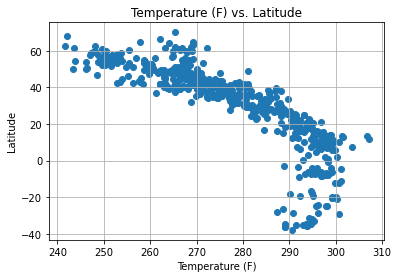

In [43]:
plt.scatter(weather_data["Temperature (F)"], weather_data["Latitude"], marker="o")

plt.title("Temperature (F) vs. Latitude")
plt.ylabel("Latitude")
plt.xlabel("Temperature (F)")
plt.grid(True)
plt.savefig("TemperaturevsLatitude.png")
plt.show()

#### Conclusions
In the previuos graph we can visualize the relathionship between                temperature and latitude of 600 cities across the world. We can conclude        from the graph that the further the city to the ecuador the lowest the          temperature 

## Humidity (%) vs. Latitude

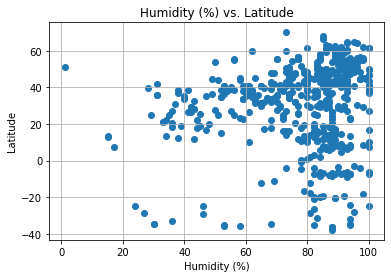

In [44]:
plt.scatter(weather_data["Humidity (%)"], weather_data["Latitude"], marker="o")

plt.title("Humidity (%) vs. Latitude")
plt.ylabel("Latitude")
plt.xlabel("Humidity (%)")
plt.grid(True)
plt.savefig("HumidityvsLatitude.png")
plt.show()

### Conclusions
In the previuos graph we can visualize the relathionship between                humidity and latitude of 600 cities across the world. We can                    conclude from the graph that there is not a clear relantioship between the      two variables, however, the bigger concentration of high temperatures          is at the cities closest to the ecuador 

## Cloudiness (%) vs. Latitude

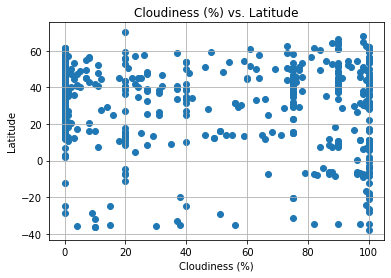

In [45]:
plt.scatter(weather_data["Cloudiness (%)"], weather_data["Latitude"], marker="o")

plt.title("Cloudiness (%) vs. Latitude")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("CloudinessvsLatitude.png")
plt.show()

### Conclusions
In the previuos graph we can visualize the relathionship between                Cloudiness and Latitude of 600 cities across the world. We can                conclude from the graph that the cities located in a latitude between 10 and 20 have a high concentration  of cloudiness.

## Wind Speed (mph) vs. Latitude

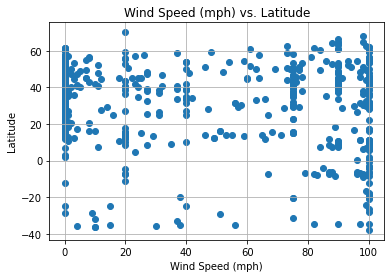

In [71]:
plt.scatter(weather_data["Cloudiness (%)"], weather_data["Latitude"], marker="o")

plt.title("Wind Speed (mph) vs. Latitude")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("WindSpeedvsLatitude.png")
plt.show()

### Conclusions
In the previuos graph we can visualize the relathionship between                Wind speed and Latitude of 600 cities across the world. The behaviour of this graph is pretty similar at the previous graph.
We can conclude from the graph that the cities located in a latitude between 10 and 20 have a high concentration of wind speed.

In [72]:
Northern_Hemisphere = weather_data.loc[lambda weather_data: weather_data['Latitude'] >= 0]

In [73]:
Southern_Hemisphere=weather_data.loc[lambda weather_data: weather_data['Latitude'] < 0]

In [75]:
Northern_Hemisphere
Northern_Hemisphere.to_csv(r'Results\Northern_Hemisphere.csv')

In [76]:
Southern_Hemisphere
Southern_Hemisphere.to_csv('Results\Southern_Hemisphere.csv')

### Northern Hemisphere - Temperature (F) vs. Latitude

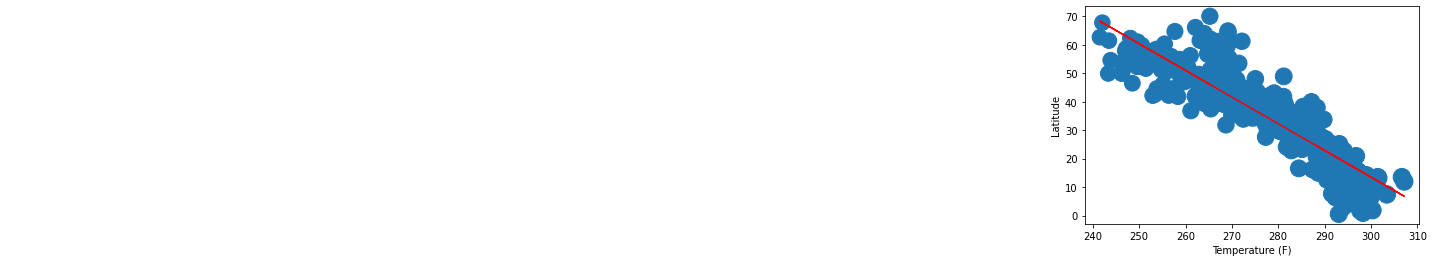

<Figure size 432x288 with 0 Axes>

In [86]:
x_values = Northern_Hemisphere['Temperature (F)']
y_values = Northern_Hemisphere['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o", s=x_values, alpha=1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")

plt.xlabel("Temperature (F)")
plt.ylabel('Latitude')
plt.show()
plt.savefig("North_TemperaturevsLatitude.png")

### Southern Hemisphere - Temperature (F) vs. Latitude


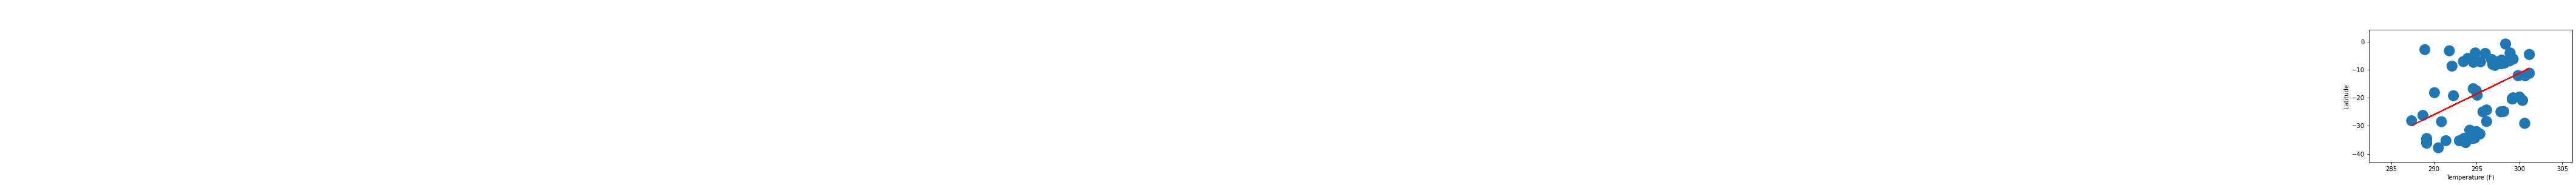

<Figure size 432x288 with 0 Axes>

In [79]:
x_values = Southern_Hemisphere['Temperature (F)']
y_values = Southern_Hemisphere['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", s=x_values, alpha=1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")
plt.xlim(min(Southern_Hemisphere['Temperature (F)'])-5, max(Southern_Hemisphere['Temperature (F)'])+5)
plt.ylim(min(Southern_Hemisphere['Latitude'])-5, max(Southern_Hemisphere['Latitude'])+5)
plt.xlabel("Temperature (F)")
plt.ylabel('Latitude')
plt.show()
plt.savefig("South_TemperaturevsLatitude.png")

### Northern Hemisphere - Humidity (%) vs. Latitude

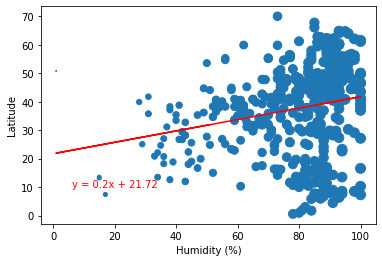

<Figure size 432x288 with 0 Axes>

In [80]:
x_values = Northern_Hemisphere['Humidity (%)']
y_values = Northern_Hemisphere['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o", s=x_values, alpha=1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Humidity (%)")
plt.ylabel('Latitude')
plt.show()
plt.savefig("North_HumidityvsLatitude.png")

### Southern Hemisphere - Humidity (%) vs. Latitude

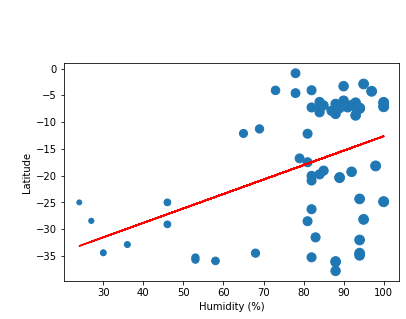

<Figure size 432x288 with 0 Axes>

In [81]:
x_values = Southern_Hemisphere['Humidity (%)']
y_values = Southern_Hemisphere['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o", s=x_values, alpha=1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Humidity (%)")
plt.ylabel('Latitude')
plt.show()
plt.savefig("South_HumidityvsLatitude.png")

### Northern Hemisphere - Cloudiness (%) vs. Latitude 

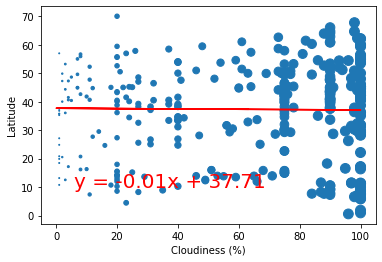

<Figure size 432x288 with 0 Axes>

In [82]:
x_values = Northern_Hemisphere['Cloudiness (%)']
y_values = Northern_Hemisphere['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", s=x_values, alpha=1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")
plt.xlabel("Cloudiness (%)")
plt.ylabel('Latitude')
plt.show()
plt.savefig("North_CloudinessvsLatitude.png")

### Southern Hemisphere -  Cloudiness (%) vs. Latitude

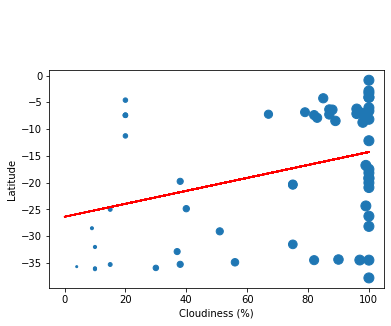

<Figure size 432x288 with 0 Axes>

In [83]:
x_values = Southern_Hemisphere['Cloudiness (%)']
y_values = Southern_Hemisphere['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", s=x_values, alpha=1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")
plt.xlabel("Cloudiness (%)")
plt.ylabel('Latitude')
plt.show()
plt.savefig("South_CloudinessvsLatitude.png")

### Northern Hemisphere - Wind Speed (mph) vs. Latitude 

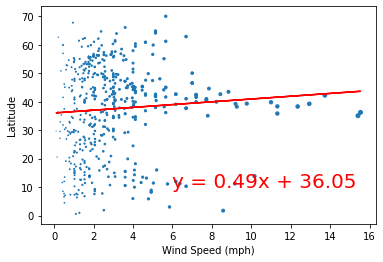

<Figure size 432x288 with 0 Axes>

In [84]:
x_values = Northern_Hemisphere['Wind Speed (mph)']
y_values = Northern_Hemisphere['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", s=x_values, alpha=1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")
plt.xlabel("Wind Speed (mph)")
plt.ylabel('Latitude')
plt.show()
plt.savefig("North_WindvsLatitude.png")

### Southern Hemisphere - Wind Speed (mph) vs. Latitude

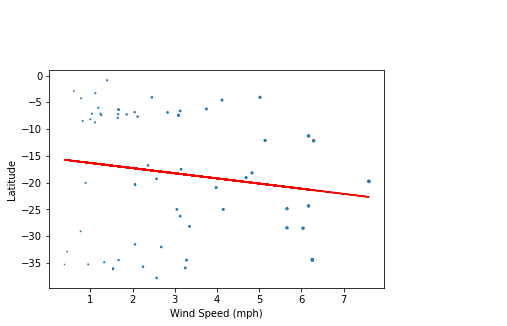

<Figure size 432x288 with 0 Axes>

In [85]:
x_values = Southern_Hemisphere['Wind Speed (mph)']
y_values = Southern_Hemisphere['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", s=x_values, alpha=1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")
plt.xlabel("Wind Speed (mph)")
plt.ylabel('Latitude')
plt.show()
plt.savefig("South_WindvsLatitude.png")